# Projet Final fouille de donnée

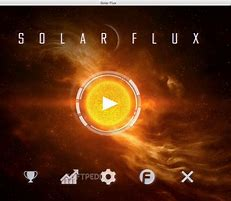

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px


%matplotlib inline
sns.set_style('whitegrid')

# IMPORT DES  BASES

In [163]:
df = pd.read_csv("possession_2014_2015.csv")
df1 = pd.read_csv("moufia_2014_2015.csv")
df2 = pd.read_csv("saintandre_2014_2015.csv")
df3 = pd.read_csv("saintleu_2014_2015.csv")
df4 = pd.read_csv("saintpierre_2014_2015.csv")

# EXPLORATION DE LA BASE POSSESSION

In [166]:
df.head()

,Timestamp,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean
0,2014-01-01 00:00:00,3.298,1.565,1009.600,62.36666,26.7,139.3986,1.316667
1,2014-01-01 00:01:00,3.466,3.913,1009.600,62.26666,26.7,132.1638,2.200000
2,2014-01-01 00:02:00,0.839,1.453,1009.600,62.03333,26.7,123.2599,1.866667
3,2014-01-01 00:03:00,3.354,1.621,1009.600,61.78333,26.7,122.6728,2.066667
4,2014-01-01 00:04:00,0.894,3.857,1009.533,61.56667,26.7,132.4675,2.116667


# EXPLORATIONS

In [168]:
#### ajout de Kb
df["Kb"]=(df["FG_Avg"]-df["FD_Avg"])/df["FG_Avg"]

In [169]:
df1["Kb"]=(df1["FG_Avg"]-df1["FD_Avg"])/df1["FG_Avg"]
df2["Kb"]=(df2["FG_Avg"]-df2["FD_Avg"])/df2["FG_Avg"]
df3["Kb"]=(df3["FG_Avg"]-df3["FD_Avg"])/df3["FG_Avg"]
df4["Kb"]=(df4["FG_Avg"]-df4["FD_Avg"])/df4["FG_Avg"]

## Histogramme

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4c2c71860>,
      dtype=object)

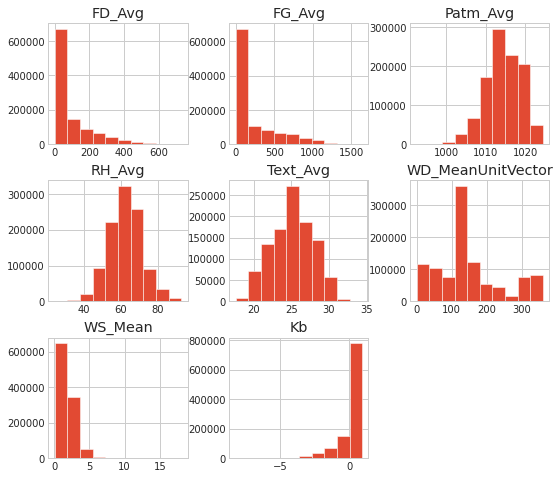

In [170]:
fig, ax = plt.subplots(figsize=(8, 8))
df.hist(grid=True,ax=ax)

Some Preprocesing 

In [172]:
df=df[df["Kb"]>=0]###### On enlève les valeurs aberrante
df1=df1[df1["Kb"]>=0]
df2=df2[df2["Kb"]>=0]
df3=df3[df3["Kb"]>=0]
df4=df4[df4["Kb"]>=0]

In [173]:
df=df[df["Kb"]<=1]
df1=df1[df1["Kb"]<=1]
df2=df2[df2["Kb"]<=1]
df3=df3[df3["Kb"]<=1]
df4=df4[df4["Kb"]<=1]

Les valeurs de Kb qui ne sont pas entre 0 et 1 ont été enlevé ce qui a représenté environ 22%

In [176]:
df=df[df["FG_Avg"]<=1400]
df1=df1[df1["FG_Avg"]<=1400]
df2=df2[df2["FG_Avg"]<=1400]
df3=df3[df3["FG_Avg"]<=1400]
df4=df4[df4["FG_Avg"]<=1400]

On reste au alentours de 22% supprimés

# Box PLOT et statistiques des données

In [179]:
### On découpe les bases selon les années

import time
from datetime import datetime

d = datetime(2015, 1, 1,0,0)

df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y%m%d %H:%M:%S') #### conersion des timestam en datetime
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'], format='%Y%m%d %H:%M:%S')
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'], format='%Y%m%d %H:%M:%S')
df3['Timestamp'] = pd.to_datetime(df3['Timestamp'], format='%Y%m%d %H:%M:%S')
df4['Timestamp'] = pd.to_datetime(df4['Timestamp'], format='%Y%m%d %H:%M:%S')

P_2014=df[df["Timestamp"]<d ]
P_2015=df[df["Timestamp"]>=d]

M_2014=df1[df1["Timestamp"]<d ]
M_2015=df1[df1["Timestamp"]>=d]


SA_2014=df2[df2["Timestamp"]<d ]
SA_2015=df2[df2["Timestamp"]>=d]


SL_2014=df3[df3["Timestamp"]<d ]
SL_2015=df3[df3["Timestamp"]>=d]

SP_2014=df4[df4["Timestamp"]<d]
SP_2015=df4[df4["Timestamp"]>=d]

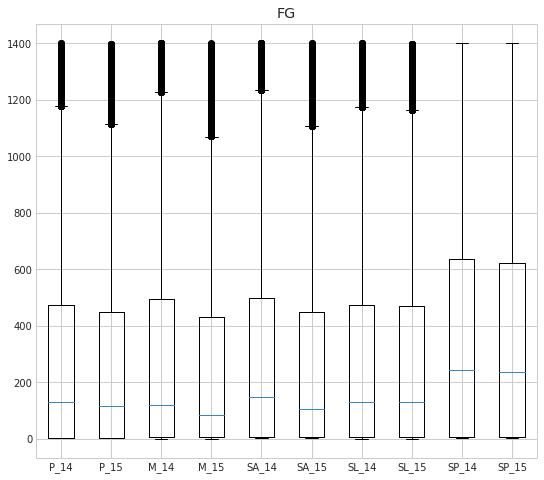

In [180]:
import matplotlib.pyplot as mp
import seaborn as sb 
import numpy as np

box_plot_data=[P_2014["FG_Avg"],P_2015["FG_Avg"],M_2014["FG_Avg"],M_2015["FG_Avg"],SA_2014["FG_Avg"],SA_2015["FG_Avg"],SL_2014["FG_Avg"],SL_2015["FG_Avg"],SP_2014["FG_Avg"],SP_2015["FG_Avg"]]
fig, ax = mp.subplots(figsize=(8, 8))
mp.boxplot(box_plot_data,labels=['P_14','P_15','M_14','M_15','SA_14','SA_15','SL_14','SL_15','SP_14','SP_15'])

mp.title("FG")
mp.show()

## Suppression des outliers pour FG

In [181]:
###### LA POSSESSION SUPPRESSION DES OUTLIERS
Q1 = P_2014['FG_Avg'].quantile(0.25)
Q3 = P_2014['FG_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (P_2014['FG_Avg'] > Q1 - 1.5 * IQR) & (P_2014['FG_Avg'] < Q3 + 1.5 *IQR)

P_2014 = P_2014.loc[filter1]  


Q1 = P_2015['FG_Avg'].quantile(0.25)
Q3 = P_2015['FG_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (P_2015['FG_Avg'] > Q1 - 1.5 * IQR) & (P_2015['FG_Avg'] < Q3 + 1.5 *IQR)
P_2015 = P_2015.loc[filter2]

###### MOUFIA SUPPRESSION DES OUTLIERS
Q1 = M_2014['FG_Avg'].quantile(0.25)
Q3 = M_2014['FG_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (M_2014['FG_Avg'] > Q1 - 1.5 * IQR) & (M_2014['FG_Avg'] < Q3 + 1.5 *IQR)

M_2014 = M_2014.loc[filter1]  


Q1 = M_2015['FG_Avg'].quantile(0.25)
Q3 = M_2015['FG_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (M_2015['FG_Avg'] > Q1 - 1.5 * IQR) & (M_2015['FG_Avg'] < Q3 + 1.5 *IQR)
M_2015 = M_2015.loc[filter2]
###### SAINT ANDRE SUPPRESSION DES OUTLIERS

Q1 = SA_2014['FG_Avg'].quantile(0.25)
Q3 = SA_2014['FG_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SA_2014['FG_Avg'] > Q1 - 1.5 * IQR) & (SA_2014['FG_Avg'] < Q3 + 1.5 *IQR)

SA_2014 = SA_2014.loc[filter1]  


Q1 = SA_2015['FG_Avg'].quantile(0.25)
Q3 = SA_2015['FG_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SA_2015['FG_Avg'] > Q1 - 1.5 * IQR) & (SA_2015['FG_Avg'] < Q3 + 1.5 *IQR)
SA_2015 = SA_2015.loc[filter2]
###### SAINT LE SUPPRESSION DES OUTLIERS
Q1 = SL_2014['FG_Avg'].quantile(0.25)
Q3 = SL_2014['FG_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SL_2014['FG_Avg'] > Q1 - 1.5 * IQR) & (SL_2014['FG_Avg'] < Q3 + 1.5 *IQR)

SL_2014 = SL_2014.loc[filter1]  


Q1 = SL_2015['FG_Avg'].quantile(0.25)
Q3 = SL_2015['FG_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SL_2015['FG_Avg'] > Q1 - 1.5 * IQR) & (SL_2015['FG_Avg'] < Q3 + 1.5 *IQR)
SL_2015 = SL_2015.loc[filter2]
###### SAINT PIERRE SUPPRESSION DES OUTLIERS
Q1 = SP_2014['FG_Avg'].quantile(0.25)
Q3 = SP_2014['FG_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SP_2014['FG_Avg'] > Q1 - 1.5 * IQR) & (SP_2014['FG_Avg'] < Q3 + 1.5 *IQR)

SP_2014 = SP_2014.loc[filter1]  

Q1 = SP_2015['FG_Avg'].quantile(0.25)
Q3 = SP_2015['FG_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SP_2015['FG_Avg']>Q1 - 1.5*IQR) & (SP_2015['FG_Avg'] < Q3 + 1.5 *IQR)
SP_2015 = SP_2015.loc[filter2]

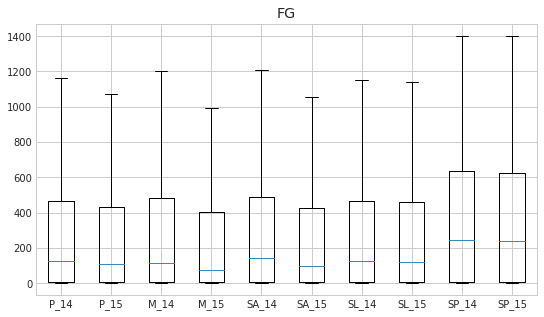

In [182]:
box_plot_data=[P_2014["FG_Avg"],P_2015["FG_Avg"],M_2014["FG_Avg"],M_2015["FG_Avg"],SA_2014["FG_Avg"],SA_2015["FG_Avg"],SL_2014["FG_Avg"],SL_2015["FG_Avg"],SP_2014["FG_Avg"],SP_2015["FG_Avg"]]
fig, ax = mp.subplots(figsize=(8, 5))
mp.boxplot(box_plot_data,labels=['P_14','P_15','M_14','M_15','SA_14','SA_15','SL_14','SL_15','SP_14','SP_15'],showfliers=False)

mp.title("FG")
mp.show()

# BOXPOT POUR FD_AVG

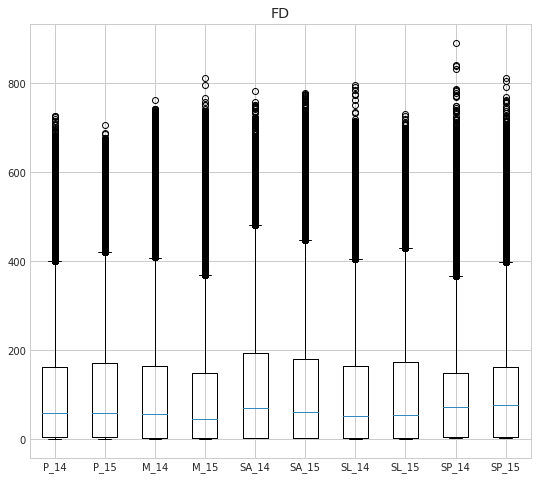

In [184]:
box_plot_data=[P_2014["FD_Avg"],P_2015["FD_Avg"],M_2014["FD_Avg"],M_2015["FD_Avg"],SA_2014["FD_Avg"],SA_2015["FD_Avg"],SL_2014["FD_Avg"],SL_2015["FD_Avg"],SP_2014["FD_Avg"],SP_2015["FD_Avg"]]
fig, ax = mp.subplots(figsize=(8, 8))
mp.boxplot(box_plot_data,labels=['P_14','P_15','M_14','M_15','SA_14','SA_15','SL_14','SL_15','SP_14','SP_15'])

mp.title("FD")
mp.show()

## Suppression des Outliers pour FD

In [185]:
###### LA POSSESSION SUPPRESSION DES OUTLIERS
Q1 = P_2014['FD_Avg'].quantile(0.25)
Q3 = P_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (P_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (P_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

P_2014 = P_2014.loc[filter1]  


Q1 = P_2015['FD_Avg'].quantile(0.25)
Q3 = P_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (P_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (P_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
P_2015 = P_2015.loc[filter2]

###### MOUFIA SUPPRESSION DES OUTLIERS
Q1 = M_2014['FD_Avg'].quantile(0.25)
Q3 = M_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (M_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (M_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

M_2014 = M_2014.loc[filter1]  


Q1 = M_2015['FD_Avg'].quantile(0.25)
Q3 = M_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (M_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (M_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
M_2015 = M_2015.loc[filter2]
###### SAINT ANDRE SUPPRESSION DES OUTLIERS

Q1 = SA_2014['FD_Avg'].quantile(0.25)
Q3 = SA_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SA_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (SA_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

SA_2014 = SA_2014.loc[filter1]  


Q1 = SA_2015['FD_Avg'].quantile(0.25)
Q3 = SA_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SA_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (SA_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
SA_2015 = SA_2015.loc[filter2]
###### SAINT LE SUPPRESSION DES OUTLIERS
Q1 = SL_2014['FD_Avg'].quantile(0.25)
Q3 = SL_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SL_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (SL_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

SL_2014 = SL_2014.loc[filter1]  


Q1 = SL_2015['FD_Avg'].quantile(0.25)
Q3 = SL_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SL_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (SL_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
SL_2015 = SL_2015.loc[filter2]
###### SAINT PIERRE SUPPRESSION DES OUTLIERS
Q1 = SP_2014['FD_Avg'].quantile(0.25)
Q3 = SP_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SP_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (SP_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

SP_2014 = SP_2014.loc[filter1]  

Q1 = SP_2015['FD_Avg'].quantile(0.25)
Q3 = SP_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SP_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (SP_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
SP_2015 = SP_2015.loc[filter2]

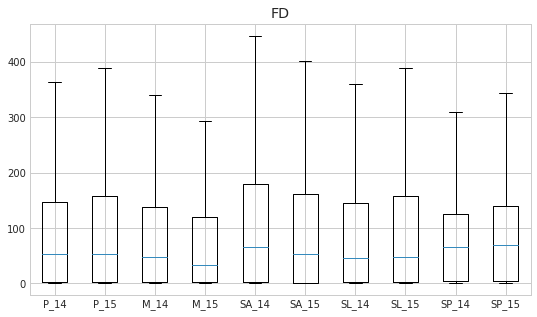

In [186]:
box_plot_data=[P_2014["FD_Avg"],P_2015["FD_Avg"],M_2014["FD_Avg"],M_2015["FD_Avg"],SA_2014["FD_Avg"],SA_2015["FD_Avg"],SL_2014["FD_Avg"],SL_2015["FD_Avg"],SP_2014["FD_Avg"],SP_2015["FD_Avg"]]
fig, ax = mp.subplots(figsize=(8, 5))
mp.boxplot(box_plot_data,labels=['P_14','P_15','M_14','M_15','SA_14','SA_15','SL_14','SL_15','SP_14','SP_15'],showfliers=False)


mp.title("FD")
mp.show()

BOXPLOT PRESSION ATMOSPHERIQUE

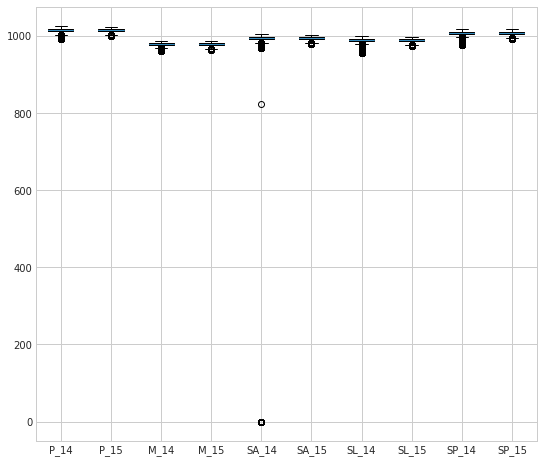

In [187]:
box_plot_data=[P_2014["Patm_Avg"],P_2015["Patm_Avg"],M_2014["Patm_Avg"],M_2015["Patm_Avg"],SA_2014["Patm_Avg"],SA_2015["Patm_Avg"],SL_2014["Patm_Avg"],SL_2015["Patm_Avg"],SP_2014["Patm_Avg"],SP_2015["Patm_Avg"]]
fig, ax = mp.subplots(figsize=(8, 8))
mp.boxplot(box_plot_data,labels=['P_14','P_15','M_14','M_15','SA_14','SA_15','SL_14','SL_15','SP_14','SP_15'])

#mp.boxplot(P_2014[5])
mp.show()

On a des valeurs valeurs pour la pression atmorsphérique: elle ne peut pas être nulle


In [188]:
Q1 = P_2014['Patm_Avg'].quantile(0.25)
Q3 = P_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (P_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (P_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

#P_2014 = P_2014.loc[filter1]  


Q1 = P_2015['Patm_Avg'].quantile(0.25)
Q3 = P_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (P_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (P_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
#P_2015 = P_2015.loc[filter2]


###### MOUFIA SUPPRESSION DES OUTLIERS




Q1 = M_2014['Patm_Avg'].quantile(0.25)
Q3 = M_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (M_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (M_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

#M_2014 = M_2014.loc[filter1]  


Q1 = M_2015['Patm_Avg'].quantile(0.25)
Q3 = M_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (M_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (M_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
#M_2015 = M_2015.loc[filter2]




###### SAINT ANDRE SUPPRESSION DES OUTLIERS
Q1 = SA_2014['Patm_Avg'].quantile(0.25)
Q3 = SA_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SA_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SA_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

SA_2014 = SA_2014.loc[filter1]  


Q1 = SA_2015['Patm_Avg'].quantile(0.25)
Q3 = SA_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SA_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SA_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
SA_2015 = SA_2015.loc[filter2]
###### SAINT LE SUPPRESSION DES OUTLIERS
Q1 = SL_2014['Patm_Avg'].quantile(0.25)
Q3 = SL_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SL_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SL_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

SL_2014 = SL_2014.loc[filter1]  


Q1 = SL_2015['Patm_Avg'].quantile(0.25)
Q3 = SL_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SL_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SL_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
SL_2015 = SL_2015.loc[filter2]
###### SAINT PIERRE SUPPRESSION DES OUTLIERS
Q1 = SP_2014['Patm_Avg'].quantile(0.25)
Q3 = SP_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SP_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SP_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)
#SP_2014 = SP_2014.loc[filter1]  
Q1 = SP_2015['Patm_Avg'].quantile(0.25)
Q3 = SP_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    
filter2 = (SP_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SP_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
#SP_2015 = SP_2015.loc[filter2]



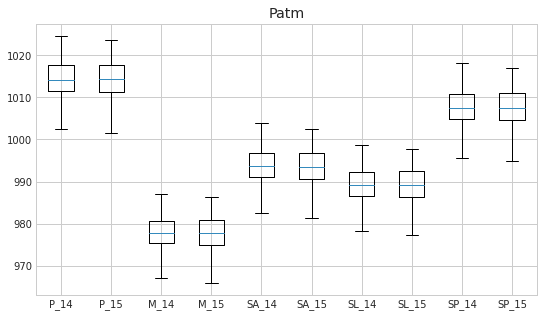

In [189]:
box_plot_data=[P_2014["Patm_Avg"],P_2015["Patm_Avg"],M_2014["Patm_Avg"],M_2015["Patm_Avg"],SA_2014["Patm_Avg"],SA_2015["Patm_Avg"],SL_2014["Patm_Avg"],SL_2015["Patm_Avg"],SP_2014["Patm_Avg"],SP_2015["Patm_Avg"]]
fig, ax = mp.subplots(figsize=(8, 5))
mp.boxplot(box_plot_data,labels=['P_14','P_15','M_14','M_15','SA_14','SA_15','SL_14','SL_15','SP_14','SP_15'],showfliers=False)

mp.title("Patm")
mp.show()

# BOXPLOT KB

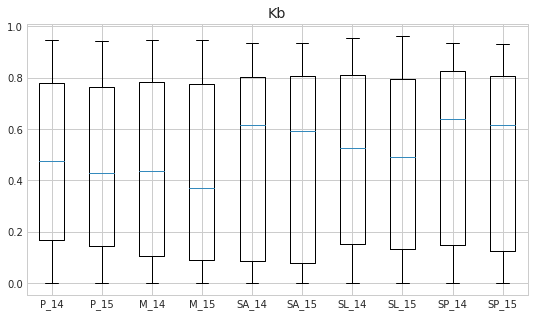

In [190]:
box_plot_data=[P_2014["Kb"],P_2015["Kb"],M_2014["Kb"],M_2015["Kb"],SA_2014["Kb"],SA_2015["Kb"],SL_2014["Kb"],SL_2015["Kb"],SP_2014["Kb"],SP_2015["Kb"]]
fig, ax = mp.subplots(figsize=(8, 5))
mp.boxplot(box_plot_data,labels=['P_14','P_15','M_14','M_15','SA_14','SA_15','SL_14','SL_15','SP_14','SP_15'])

mp.title("Kb")
mp.show()

# BOXPLOT WD_MeanUnitVector

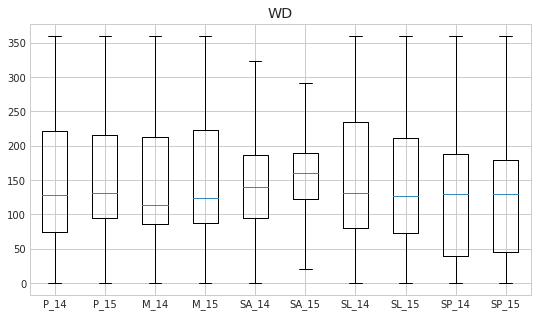

In [191]:
box_plot_data=[P_2014["WD_MeanUnitVector"],P_2015["WD_MeanUnitVector"],M_2014["WD_MeanUnitVector"],M_2015["WD_MeanUnitVector"],SA_2014["WD_MeanUnitVector"],SA_2015["WD_MeanUnitVector"],SL_2014["WD_MeanUnitVector"],SL_2015["WD_MeanUnitVector"],SP_2014["WD_MeanUnitVector"],SP_2015["WD_MeanUnitVector"]]
fig, ax = mp.subplots(figsize=(8, 5))
mp.boxplot(box_plot_data,labels=['P_14','P_15','M_14','M_15','SA_14','SA_15','SL_14','SL_15','SP_14','SP_15'],showfliers=False)

mp.title("WD")
mp.show()

# BOXPLOT WS_Mean

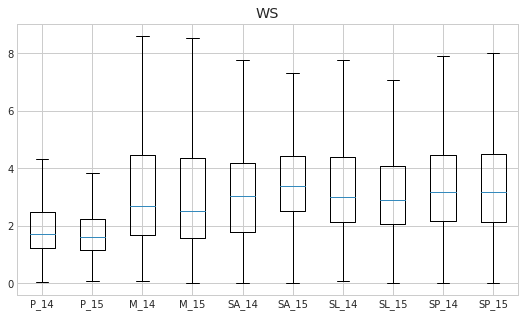

In [192]:
box_plot_data=[P_2014["WS_Mean"],P_2015["WS_Mean"],M_2014["WS_Mean"],M_2015["WS_Mean"],SA_2014["WS_Mean"],SA_2015["WS_Mean"],SL_2014["WS_Mean"],SL_2015["WS_Mean"],SP_2014["WS_Mean"],SP_2015["WS_Mean"]]
fig, ax = mp.subplots(figsize=(8, 5))
mp.boxplot(box_plot_data,labels=['P_14','P_15','M_14','M_15','SA_14','SA_15','SL_14','SL_15','SP_14','SP_15'],showfliers=False)

mp.title("WS")
mp.show()

# BOXPLOT RH_Avg

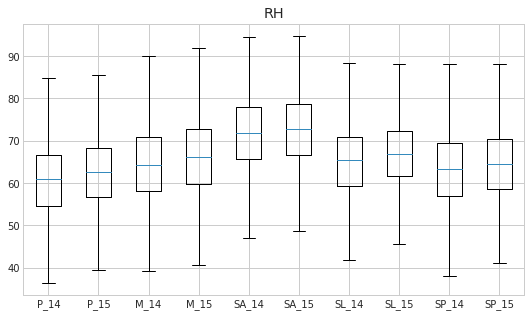

In [193]:
box_plot_data=[P_2014["RH_Avg"],P_2015["RH_Avg"],M_2014["RH_Avg"],M_2015["RH_Avg"],SA_2014["RH_Avg"],SA_2015["RH_Avg"],SL_2014["RH_Avg"],SL_2015["RH_Avg"],SP_2014["RH_Avg"],SP_2015["RH_Avg"]]
fig, ax = mp.subplots(figsize=(8, 5))
mp.boxplot(box_plot_data,labels=['P_14','P_15','M_14','M_15','SA_14','SA_15','SL_14','SL_15','SP_14','SP_15'],showfliers=False)

mp.title("RH")
mp.show()

# BOXPLOT Text_Avg

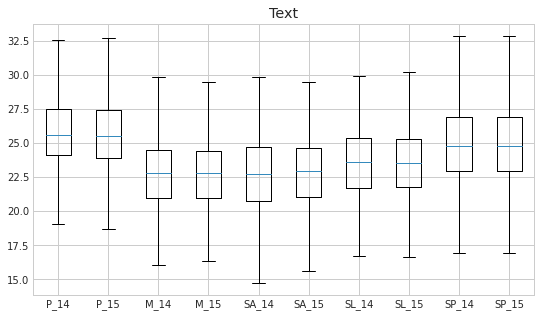

In [194]:
box_plot_data=[P_2014["Text_Avg"],P_2015["Text_Avg"],M_2014["Text_Avg"],M_2015["Text_Avg"],SA_2014["Text_Avg"],SA_2015["Text_Avg"],SL_2014["Text_Avg"],SL_2015["Text_Avg"],SP_2014["Text_Avg"],SP_2015["Text_Avg"]]
fig, ax = mp.subplots(figsize=(8, 5))
mp.boxplot(box_plot_data,labels=['P_14','P_15','M_14','M_15','SA_14','SA_15','SL_14','SL_15','SP_14','SP_15'],showfliers=False)

mp.title("Text")
mp.show()

# Correlation

In [195]:
df=df.drop(["FD_Avg","FG_Avg"],axis=1)
df1=df1.drop(["FD_Avg","FG_Avg"],axis=1)
df2=df2.drop(["FD_Avg","FG_Avg"],axis=1)
df3=df3.drop(["FD_Avg","FG_Avg"],axis=1)
df4=df4.drop(["FD_Avg","FG_Avg"],axis=1)

In [196]:
T=[df,df1,df2,df3,df4]

Text(0.5, 1.0, 'Saint-Pierre')

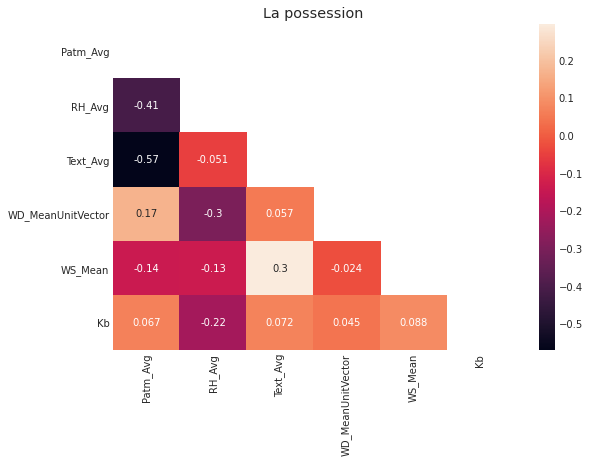

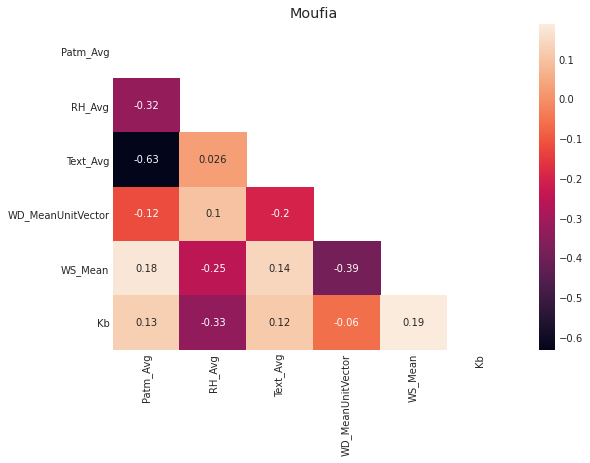

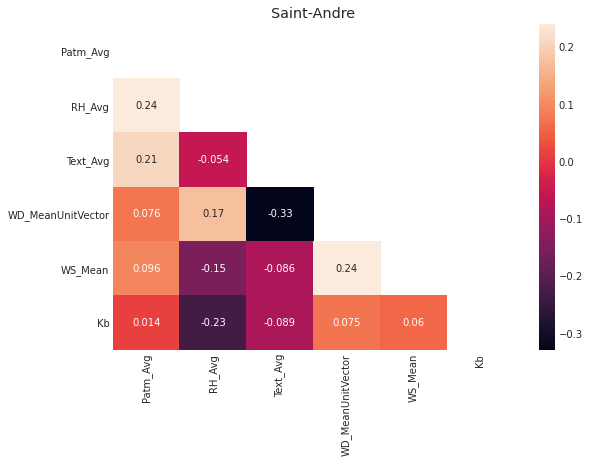

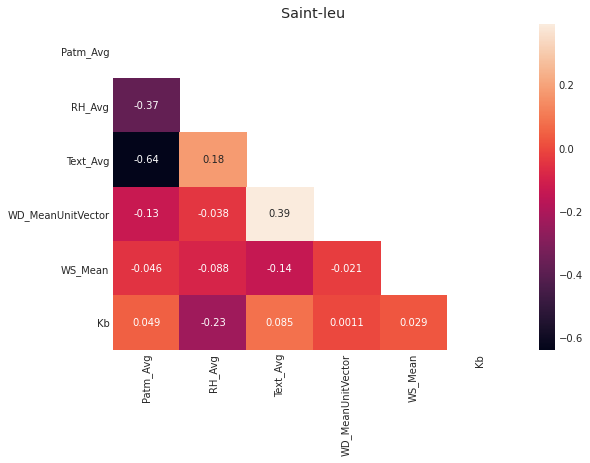

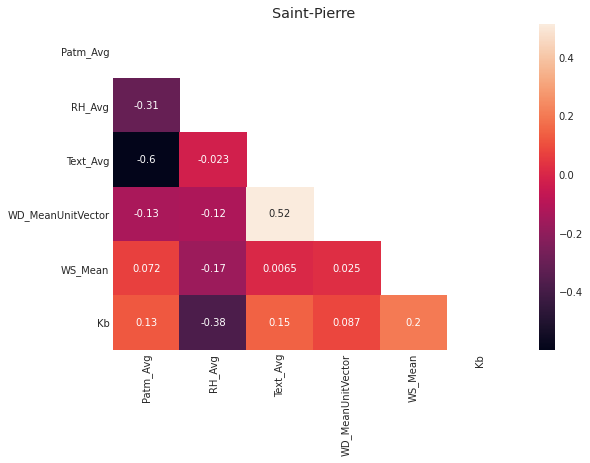

In [197]:
fig, ax=mp.subplots(figsize=(8,6))
mask = np.zeros_like(T[0].corr())
mask[np.triu_indices_from(mask)] = 1
sb.heatmap(T[0].corr(), mask=mask, ax=ax,annot=True) 
ax.set_title("La possession")


fig, ax=mp.subplots(figsize=(8,6))
mask = np.zeros_like(T[1].corr())
mask[np.triu_indices_from(mask)] = 1
sb.heatmap(T[1].corr(), mask=mask, ax=ax,annot=True) 
ax.set_title("Moufia")

fig, ax=mp.subplots(figsize=(8,6))
mask = np.zeros_like(T[2].corr())
mask[np.triu_indices_from(mask)] = 1
sb.heatmap(T[2].corr(), mask=mask, ax=ax,annot=True) 
ax.set_title("Saint-Andre")


fig, ax=mp.subplots(figsize=(8,6))
mask = np.zeros_like(T[3].corr())
mask[np.triu_indices_from(mask)] = 1
sb.heatmap(T[3].corr(), mask=mask, ax=ax,annot=True) 
ax.set_title("Saint-leu")


fig, ax=mp.subplots(figsize=(8,6))
mask = np.zeros_like(T[4].corr())
mask[np.triu_indices_from(mask)] = 1
sb.heatmap(T[4].corr(), mask=mask, ax=ax,annot=True) 
ax.set_title("Saint-Pierre")


# PREDICTION A L'HEURE H

## Méthode de regression

Dans cette partie nous allons juste travailler avec les bases La Possession et Moufia

In [198]:
possession = pd.read_csv("possession_2014_2015.csv")


possession["Kb"]=(possession["FG_Avg"]-possession["FD_Avg"])/possession["FG_Avg"]


possession['Timestamp'] = pd.to_datetime(possession['Timestamp'], format='%Y%m%d %H:%M:%S')

possession=possession[possession["Kb"]>=0]

possession=possession[possession["Kb"]<=1]

data_hourly_possession = possession.resample('H',on='Timestamp').mean()

In [199]:
data_hourly_possession

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,Kb
Timestamp,,,,,,,,
2014-01-01 00:00:00,1.386857,3.247548,1009.303571,61.773807,26.765080,110.761730,1.483333,0.514160
2014-01-01 01:00:00,1.630000,3.890114,1008.577295,67.603787,26.731439,124.160171,1.010985,0.554001
2014-01-01 02:00:00,1.693977,3.684302,1008.070535,67.656588,26.485659,123.007079,0.972868,0.523351
2014-01-01 03:00:00,1.868633,3.698735,1008.212571,64.755781,26.704082,105.846443,1.473469,0.472016
2014-01-01 04:00:00,2.297480,4.522300,1008.239000,59.488997,27.396999,109.499254,1.505333,0.458753
...,...,...,...,...,...,...,...,...
2015-12-30 19:00:00,2.168639,4.250333,1009.735667,86.338886,24.047685,161.545603,1.205555,0.454577
2015-12-30 20:00:00,2.417000,4.576121,1009.933848,85.619695,23.747475,147.995273,1.130808,0.450012
2015-12-30 21:00:00,2.621023,4.758488,1010.377116,83.577517,23.522480,142.844384,1.137209,0.441002


In [200]:
data_hourly_possession.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17496 entries, 2014-01-01 00:00:00 to 2015-12-30 23:00:00
Freq: H
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FD_Avg             17496 non-null  float64
 1   FG_Avg             17496 non-null  float64
 2   Patm_Avg           17496 non-null  float64
 3   RH_Avg             17496 non-null  float64
 4   Text_Avg           17496 non-null  float64
 5   WD_MeanUnitVector  17496 non-null  float64
 6   WS_Mean            17496 non-null  float64
 7   Kb                 17496 non-null  float64
dtypes: float64(8)
memory usage: 1.2 MB


In [201]:
data_hourly_possession=data_hourly_possession.dropna()

In [202]:
data_hourly_possession["Kb_H-1"]=data_hourly_possession["Kb"]
data_hourly_possession["Kb_H-2"]=data_hourly_possession["Kb"]
data_hourly_possession["Kb_H-3"]=data_hourly_possession["Kb"]

In [203]:
data_hourly_possession["FD_H-1"]=data_hourly_possession["FD_Avg"]
data_hourly_possession["FD_H-2"]=data_hourly_possession["FD_Avg"]
data_hourly_possession["FD_H-3"]=data_hourly_possession["FD_Avg"]

In [204]:
data_hourly_possession["FG_H-1"]=data_hourly_possession["FG_Avg"]
data_hourly_possession["FG_H-2"]=data_hourly_possession["FG_Avg"]
data_hourly_possession["FG_H-3"]=data_hourly_possession["FG_Avg"]

In [205]:
data_hourly_possession["Patm_H-1"]=data_hourly_possession["Patm_Avg"]
data_hourly_possession["Patm_H-2"]=data_hourly_possession["Patm_Avg"]
data_hourly_possession["Patm_H-3"]=data_hourly_possession["Patm_Avg"]

In [206]:
data_hourly_possession["RH_H-1"]=data_hourly_possession["RH_Avg"]
data_hourly_possession["RH_H-2"]=data_hourly_possession["RH_Avg"]
data_hourly_possession["RH_H-3"]=data_hourly_possession["RH_Avg"]

In [207]:
data_hourly_possession["Text_H-1"]=data_hourly_possession["Text_Avg"]
data_hourly_possession["Text_H-2"]=data_hourly_possession["Text_Avg"]
data_hourly_possession["Text_H-3"]=data_hourly_possession["Text_Avg"]

In [208]:
data_hourly_possession["WD_MeanUnitVector_H-1"]=data_hourly_possession["WD_MeanUnitVector"]
data_hourly_possession["WD_MeanUnitVector_H-2"]=data_hourly_possession["WD_MeanUnitVector"]
data_hourly_possession["WD_MeanUnitVector_H-3"]=data_hourly_possession["WD_MeanUnitVector"]

In [209]:
data_hourly_possession["WS_Mean_H-1"]=data_hourly_possession["WS_Mean"]
data_hourly_possession["WS_Mean_H-2"]=data_hourly_possession["WS_Mean"]
data_hourly_possession["WS_Mean_H-3"]=data_hourly_possession["WS_Mean"]

In [210]:
data_hourly_possession.reset_index(inplace=True)

In [211]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"Kb_H-1"]=data_hourly_possession.loc[i-1,"Kb"]
    data_hourly_possession.loc[i,"Kb_H-2"]=data_hourly_possession.loc[i-2,"Kb"]
    data_hourly_possession.loc[i,"Kb_H-3"]=data_hourly_possession.loc[i-3,"Kb"]

In [212]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"FD_H-1"]=data_hourly_possession.loc[i-1,"FD_Avg"]
    data_hourly_possession.loc[i,"FD_H-2"]=data_hourly_possession.loc[i-2,"FD_Avg"]
    data_hourly_possession.loc[i,"FD_H-3"]=data_hourly_possession.loc[i-3,"FD_Avg"]

In [213]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"FG_H-1"]=data_hourly_possession.loc[i-1,"FG_Avg"]
    data_hourly_possession.loc[i,"FG_H-2"]=data_hourly_possession.loc[i-2,"FG_Avg"]
    data_hourly_possession.loc[i,"FG_H-3"]=data_hourly_possession.loc[i-3,"FG_Avg"]

In [214]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"Patm_H-1"]=data_hourly_possession.loc[i-1,"Patm_Avg"]
    data_hourly_possession.loc[i,"Patm_H-2"]=data_hourly_possession.loc[i-2,"Patm_Avg"]
    data_hourly_possession.loc[i,"Patm_H-3"]=data_hourly_possession.loc[i-3,"Patm_Avg"]

In [215]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"RH_H-1"]=data_hourly_possession.loc[i-1,"RH_Avg"]
    data_hourly_possession.loc[i,"RH_H-2"]=data_hourly_possession.loc[i-2,"RH_Avg"]
    data_hourly_possession.loc[i,"RH_H-3"]=data_hourly_possession.loc[i-3,"RH_Avg"]

In [216]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"Text_H-1"]=data_hourly_possession.loc[i-1,"Text_Avg"]
    data_hourly_possession.loc[i,"Text_H-2"]=data_hourly_possession.loc[i-2,"Text_Avg"]
    data_hourly_possession.loc[i,"Text_H-3"]=data_hourly_possession.loc[i-3,"Text_Avg"]

In [217]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"WD_MeanUnitVector_H-1"]=data_hourly_possession.loc[i-1,"WD_MeanUnitVector"]
    data_hourly_possession.loc[i,"WD_MeanUnitVector_H-2"]=data_hourly_possession.loc[i-2,"WD_MeanUnitVector"]
    data_hourly_possession.loc[i,"WD_MeanUnitVector_H-3"]=data_hourly_possession.loc[i-3,"WD_MeanUnitVector"]

In [218]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"WS_Mean_H-1"]=data_hourly_possession.loc[i-1,"WS_Mean"]
    data_hourly_possession.loc[i,"WS_Mean_H-2"]=data_hourly_possession.loc[i-2,"WS_Mean"]
    data_hourly_possession.loc[i,"WS_Mean_H-3"]=data_hourly_possession.loc[i-3,"WS_Mean"]

In [219]:
data_hourly_possession=data_hourly_possession.dropna()

In [220]:
data_hourly_possession.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17496 entries, 0 to 17495
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              17496 non-null  datetime64[ns]
 1   FD_Avg                 17496 non-null  float64       
 2   FG_Avg                 17496 non-null  float64       
 3   Patm_Avg               17496 non-null  float64       
 4   RH_Avg                 17496 non-null  float64       
 5   Text_Avg               17496 non-null  float64       
 6   WD_MeanUnitVector      17496 non-null  float64       
 7   WS_Mean                17496 non-null  float64       
 8   Kb                     17496 non-null  float64       
 9   Kb_H-1                 17496 non-null  float64       
 10  Kb_H-2                 17496 non-null  float64       
 11  Kb_H-3                 17496 non-null  float64       
 12  FD_H-1                 17496 non-null  float64       
 13  F

In [221]:
scalar2=data_hourly_possession
scalar2=scalar2.drop(["FG_Avg","FD_Avg","WS_Mean","WD_MeanUnitVector","Text_Avg","RH_Avg","FG_Avg","FD_Avg","Patm_Avg"],axis=1)
scalar2 = scalar2.drop(index=[0,1,2])

In [222]:
##### On seectionne les variables et la cible Kb

X=scalar2.iloc[:,2:]
y=scalar2.iloc[:,1]

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Calcule RMSE et R2 score

In [224]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# R2 score

In [225]:
model_factory = [
    RandomForestRegressor(),
    XGBRegressor(nthread=1),
    Ridge(),
    LinearRegression(),
    DecisionTreeRegressor(),
    BayesianRidge(),
    ExtraTreesRegressor(),
    ElasticNet(),
    KNeighborsRegressor(),
    GradientBoostingRegressor()
]

for model in model_factory:
    model.seed = 42
    num_folds = 5

    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='r2', n_jobs=8)
    score_description = " %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

    print('{model:25} CV-5 R2: {score}'.format(
        model=model.__class__.__name__,
        score=score_description
    ))

RandomForestRegressor     CV-5 R2:  0.68 (+/- 0.02)
XGBRegressor              CV-5 R2:  0.67 (+/- 0.02)
Ridge                     CV-5 R2:  0.58 (+/- 0.02)
LinearRegression          CV-5 R2:  0.58 (+/- 0.02)
DecisionTreeRegressor     CV-5 R2:  0.37 (+/- 0.06)
BayesianRidge             CV-5 R2:  0.58 (+/- 0.02)
ExtraTreesRegressor       CV-5 R2:  0.68 (+/- 0.02)
ElasticNet                CV-5 R2:  0.48 (+/- 0.03)
KNeighborsRegressor       CV-5 R2:  0.57 (+/- 0.04)
GradientBoostingRegressor CV-5 R2:  0.66 (+/- 0.02)


# RMSE

In [226]:
model_factory = [
    RandomForestRegressor(),
    XGBRegressor(nthread=1),
    Ridge(),
    LinearRegression(),
    DecisionTreeRegressor(),
    BayesianRidge(),
    ExtraTreesRegressor(),
    ElasticNet(),
    KNeighborsRegressor(),
    GradientBoostingRegressor()
]

for model in model_factory:
    model.seed = 42
    num_folds = 5

    scores = cross_val_score(model, X_test, y_test, cv=num_folds, scoring='neg_root_mean_squared_error', n_jobs=8)
    score_description = " %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2)

    print('{model:25} rmse-5 R2: {score}'.format(
        model=model.__class__.__name__,
        score=score_description
    ))

RandomForestRegressor     rmse-5 R2:  0.13 (+/- 0.01)
XGBRegressor              rmse-5 R2:  0.13 (+/- 0.01)
Ridge                     rmse-5 R2:  0.14 (+/- 0.01)
LinearRegression          rmse-5 R2:  0.14 (+/- 0.01)
DecisionTreeRegressor     rmse-5 R2:  0.18 (+/- 0.02)
BayesianRidge             rmse-5 R2:  0.14 (+/- 0.01)
ExtraTreesRegressor       rmse-5 R2:  0.13 (+/- 0.01)
ElasticNet                rmse-5 R2:  0.16 (+/- 0.01)
KNeighborsRegressor       rmse-5 R2:  0.15 (+/- 0.01)
GradientBoostingRegressor rmse-5 R2:  0.13 (+/- 0.01)


## FORECASTING WITH ARIMA

In [227]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [228]:
possession = pd.read_csv("possession_2014_2015.csv")

possession["Date"]=pd.to_datetime(possession['Timestamp'],format='%Y%m%d %H:%M:%S')
possession["Kb"]=(possession["FG_Avg"]-possession["FD_Avg"])/possession["FG_Avg"]
possession=possession[possession["Kb"]>0]
possession=possession[possession["Kb"]<1]

possession.index=possession["Date"]
possession = possession.resample('D').mean()

In [229]:
possession

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,Kb
Date,,,,,,,,
2014-01-01,97.267672,102.253815,1007.663296,60.654840,27.394479,112.606226,2.024781,0.202820
2014-01-02,11.017099,13.030813,996.552272,85.475925,25.276534,143.843065,8.375175,0.266496
2014-01-03,139.374675,160.868354,1001.512999,81.210984,25.802230,243.144139,3.855998,0.242959
2014-01-04,123.227385,325.966630,1006.138331,77.452094,26.648663,209.034864,1.785977,0.453777
2014-01-05,87.667482,391.240430,1008.675197,66.279119,27.342052,83.750013,2.517102,0.593260
...,...,...,...,...,...,...,...,...
2015-12-26,129.105591,248.568924,1011.991710,60.273026,27.742477,173.204888,1.735654,0.377844
2015-12-27,111.964453,332.285559,1011.780545,62.559934,27.662102,126.096406,2.125646,0.489240
2015-12-28,109.841634,289.695222,1013.350904,59.322436,27.888943,108.088624,2.297445,0.460379


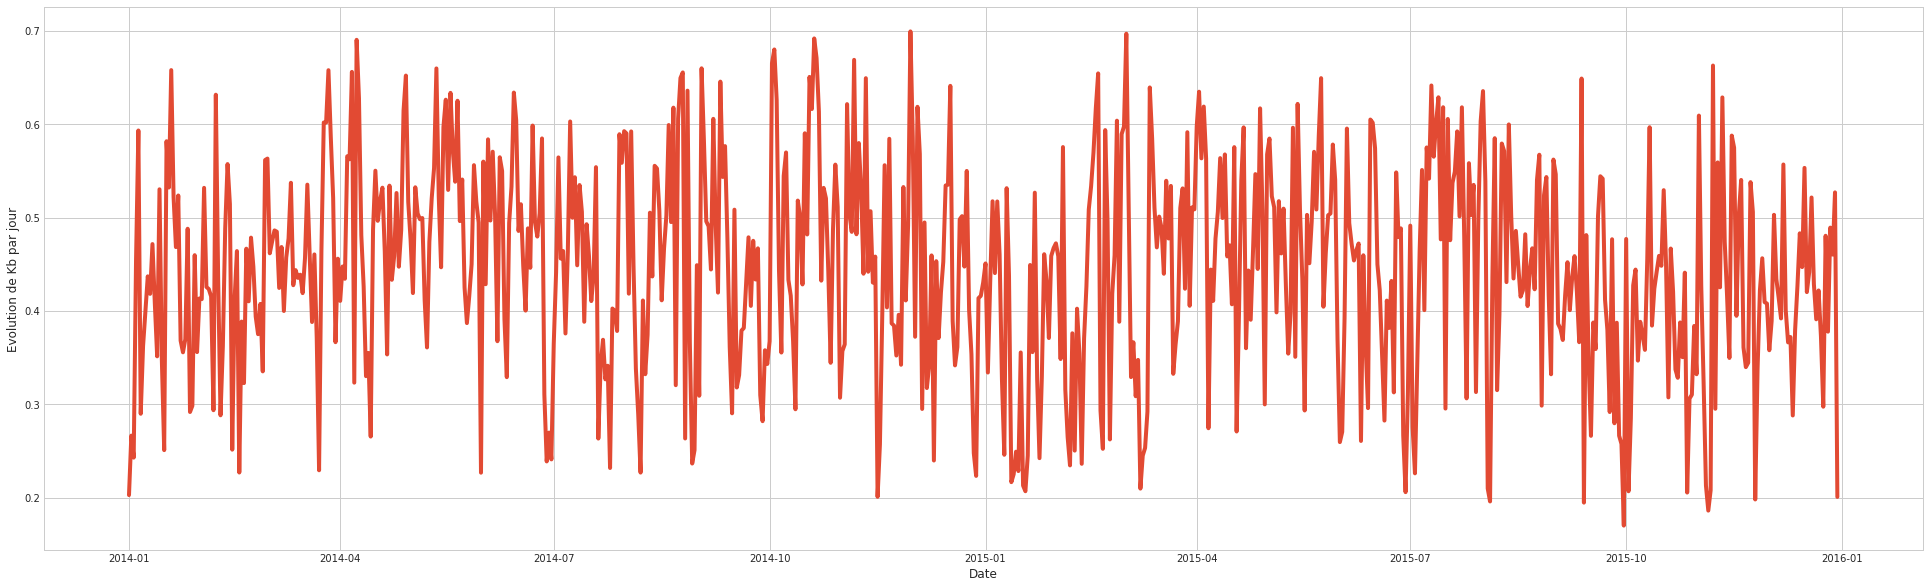

In [230]:
plt.figure(figsize=(30,10))
plt.xlabel('Date')
plt.ylabel('Evolution de Kb par jour')
plt.plot(possession["Kb"])

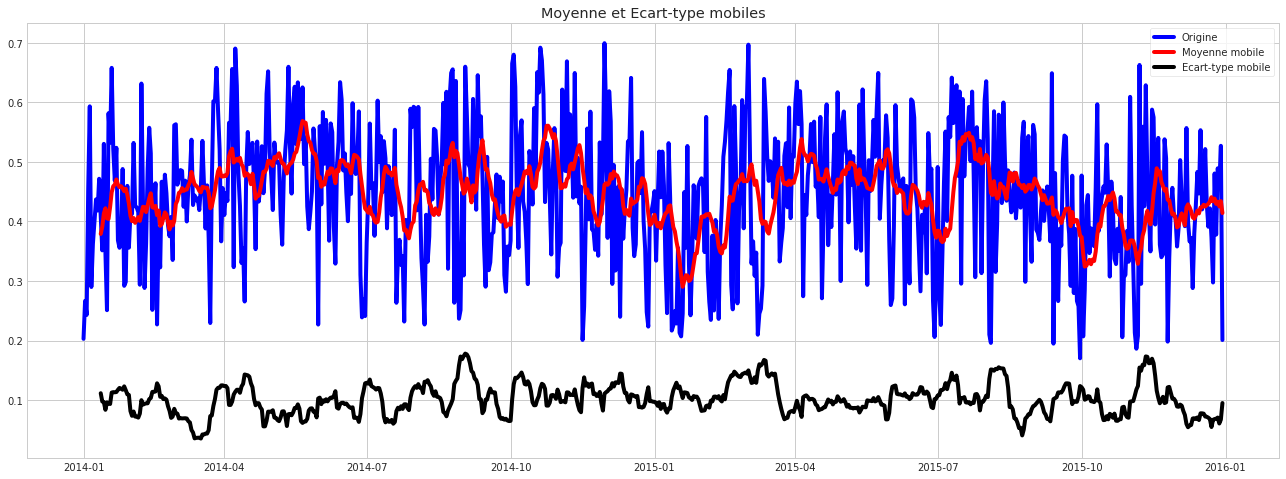

In [231]:
rolling_mean = possession["Kb"].rolling(window = 12).mean()
rolling_std =possession["Kb"].rolling(window = 12).std()
fig, ax = mp.subplots(figsize=(20, 8))
plt.plot(possession["Kb"], color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

In [232]:
model=sm.tsa.statespace.SARIMAX(possession['Kb'],order=(0,0,0), seasonal_order=(2,2,1,7),enforce_stationarity=True,enforce_invertibility=True)
res=model.fit()
print(res.summary())

                            Statespace Model Results                           
Dep. Variable:                      Kb   No. Observations:                  729
Model:             SARIMAX(2, 2, 1, 7)   Log Likelihood                 447.490
Date:                 Wed, 10 Feb 2021   AIC                           -886.980
Time:                         21:45:56   BIC                           -868.691
Sample:                     01-01-2014   HQIC                          -879.917
                          - 12-30-2015                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.7370      0.039    -18.804      0.000      -0.814      -0.660
ar.S.L14      -0.3759      0.038     -9.919      0.000      -0.450      -0.302
ma.S.L7       -0.9994      1.002     -0.997 

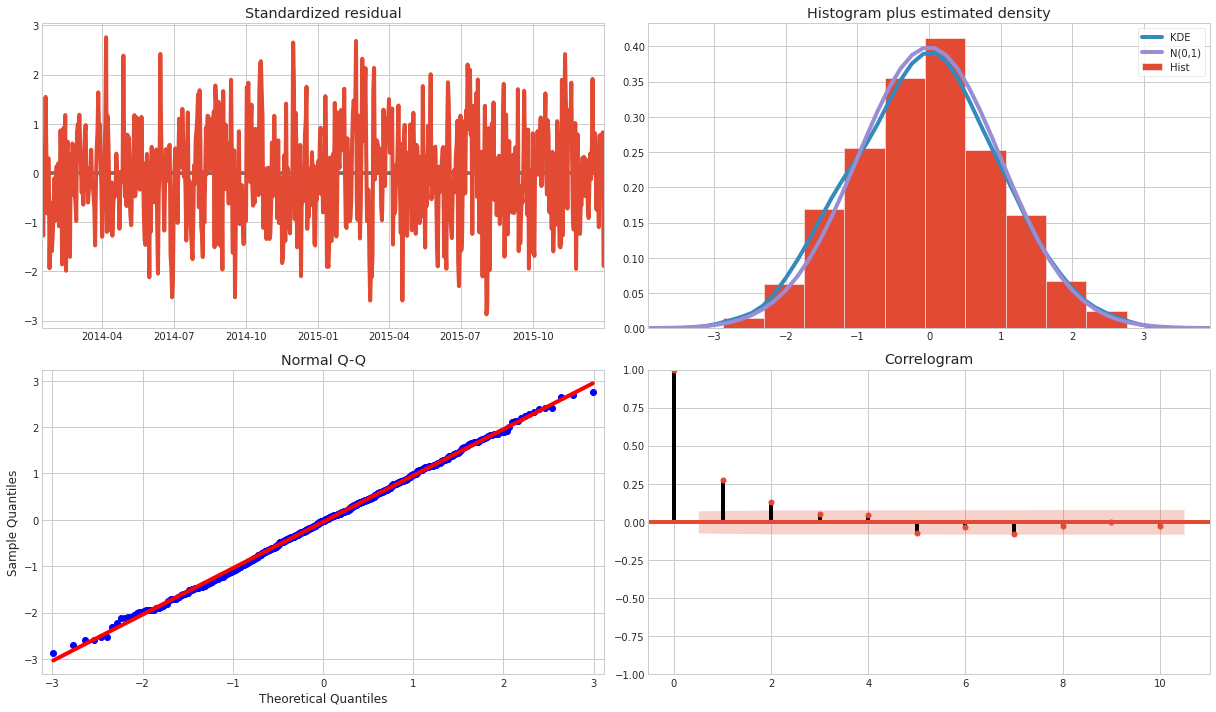

In [233]:
res.plot_diagnostics(figsize=(17,10))
plt.tight_layout()
plt.show()

In [234]:
x=possession['Kb']

<Figure size 1800x1800 with 0 Axes>

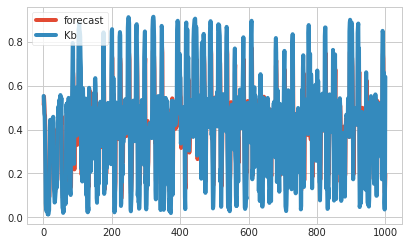

<Figure size 2520x1440 with 0 Axes>

In [235]:
decomp=seasonal_decompose(x)
model=ARIMA(data_hourly_possession['Kb'],order=(2,1,2))
fin=model.fit(disp=-1)
plt.figure(figsize=(25,25))
fin.plot_predict(1,1000)
plt.figure(figsize=(35,20))
plt.show()


# CLUSTERING

DAY ANALYSIS ON VA JUSTE AGGREGER EN JOUR

## Possession

In [236]:
possession_cluster = pd.read_csv("possession_2014_2015.csv")
possession_cluster["Kb"]=(possession_cluster["FG_Avg"]-possession_cluster["FD_Avg"])/possession_cluster["FG_Avg"]


possession_cluster['Timestamp'] = pd.to_datetime(possession_cluster['Timestamp'], format='%Y%m%d %H:%M:%S')

possession_cluster=possession_cluster[possession_cluster["Kb"]>=0]
possession_cluster=possession_cluster[possession_cluster["Kb"]<=1]

data_daily_possession_cluster = possession_cluster.resample('D',on='Timestamp').mean()
data_daily_possession_cluster=data_daily_possession_cluster.dropna()
data_daily_possession_cluster=data_daily_possession_cluster.drop(["Kb"],axis=1)

## Moufia

In [237]:
moufia_cluster = pd.read_csv("moufia_2014_2015.csv")
moufia_cluster = moufia_cluster.dropna()
moufia_cluster["Kb"]=(moufia_cluster["FG_Avg"]-moufia_cluster["FD_Avg"])/moufia_cluster["FG_Avg"]


moufia_cluster['Timestamp'] = pd.to_datetime(moufia_cluster['Timestamp'], format='%Y%m%d %H:%M:%S')

moufia_cluster=moufia_cluster[moufia_cluster["Kb"]>=0]
moufia_cluster=moufia_cluster[moufia_cluster["Kb"]<=1]

data_daily_moufia_cluster = moufia_cluster.resample('D',on='Timestamp').mean()
data_daily_moufia_cluster = data_daily_moufia_cluster.dropna()
data_daily_moufia_cluster=data_daily_moufia_cluster.drop(["Kb"],axis=1)

## Saint Andre

In [238]:
saintandre_cluster = pd.read_csv("saintandre_2014_2015.csv")
saintandre_cluster["Kb"]=(saintandre_cluster["FG_Avg"]-saintandre_cluster["FD_Avg"])/saintandre_cluster["FG_Avg"]


saintandre_cluster['Timestamp'] = pd.to_datetime(saintandre_cluster['Timestamp'], format='%Y%m%d %H:%M:%S')

saintandre_cluster=saintandre_cluster[saintandre_cluster["Kb"]>=0]
saintandre_cluster=saintandre_cluster[saintandre_cluster["Kb"]<=1]

data_daily_saintandre_cluster = saintandre_cluster.resample('D',on='Timestamp').mean()
data_daily_saintandre_cluster = data_daily_saintandre_cluster.dropna()
data_daily_saintandre_cluster=data_daily_saintandre_cluster.drop(["Kb"],axis=1)

## Saint Leu

In [239]:
saintleu_cluster = pd.read_csv("saintleu_2014_2015.csv")
saintleu_cluster["Kb"]=(saintleu_cluster["FG_Avg"]-saintleu_cluster["FD_Avg"])/saintleu_cluster["FG_Avg"]


saintleu_cluster['Timestamp'] = pd.to_datetime(saintleu_cluster['Timestamp'], format='%Y%m%d %H:%M:%S')

saintleu_cluster=saintleu_cluster[saintleu_cluster["Kb"]>=0]
saintleu_cluster=saintleu_cluster[saintleu_cluster["Kb"]<=1]

data_daily_saintleu_cluster = saintleu_cluster.resample('D',on='Timestamp').mean()
data_daily_saintleu_cluster = data_daily_saintleu_cluster.dropna()
data_daily_saintleu_cluster=data_daily_saintleu_cluster.drop(["Kb"],axis=1)

## Saint Pierre

In [240]:
saintpierre_cluster = pd.read_csv("saintpierre_2014_2015.csv")
saintpierre_cluster["Kb"]=(saintpierre_cluster["FG_Avg"]-saintpierre_cluster["FD_Avg"])/saintpierre_cluster["FG_Avg"]


saintpierre_cluster['Timestamp'] = pd.to_datetime(saintpierre_cluster['Timestamp'], format='%Y%m%d %H:%M:%S')

saintpierre_cluster=saintpierre_cluster[saintpierre_cluster["Kb"]>=0]
saintpierre_cluster=saintpierre_cluster[saintpierre_cluster["Kb"]<=1]

data_daily_saintpierre_cluster = saintpierre_cluster.resample('D',on='Timestamp').mean()
data_daily_saintpierre_cluster=data_daily_saintpierre_cluster.dropna()
data_daily_saintpierre_cluster=data_daily_saintpierre_cluster.drop(["Kb"],axis=1)

 # Elbow Method

In [241]:
!pip install minisom
!pip install kneed

In [242]:
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

data_daily_possession_cluster = StandardScaler().fit_transform(data_daily_possession_cluster)
data_daily_moufia_cluster = StandardScaler().fit_transform(data_daily_moufia_cluster)
data_daily_saintandre_cluster = StandardScaler().fit_transform(data_daily_saintandre_cluster)
data_daily_saintleu_cluster = StandardScaler().fit_transform(data_daily_saintleu_cluster)
data_daily_saintpierre_cluster = StandardScaler().fit_transform(data_daily_saintpierre_cluster)


## Possession

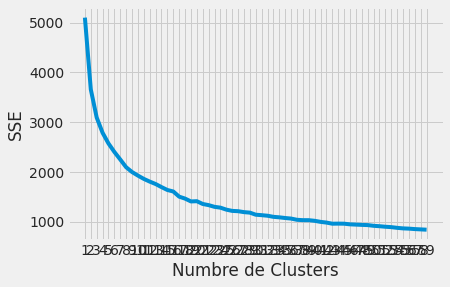

In [243]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
}
sse = []
for k in range(1, 60):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_daily_possession_cluster)
    sse.append(kmeans.inertia_)
               
               
plt.style.use("fivethirtyeight")
plt.plot(range(1, 60), sse)
plt.xticks(range(1, 60))
plt.xlabel("Numbre de Clusters")
plt.ylabel("SSE")
plt.show()

In [244]:
k1 = KneeLocator(range(1,60), sse, curve="convex", direction="decreasing")
k1.elbow

9

## Moufia

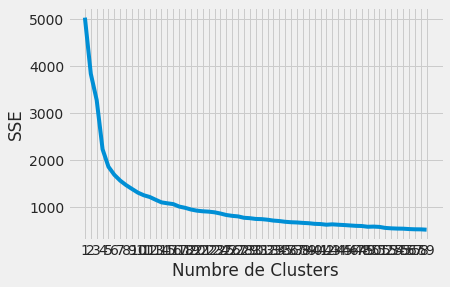

In [245]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
}
sse = []
for k in range(1, 60):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_daily_moufia_cluster)
    sse.append(kmeans.inertia_)
               
               
plt.style.use("fivethirtyeight")
plt.plot(range(1, 60), sse)
plt.xticks(range(1, 60))
plt.xlabel("Numbre de Clusters")
plt.ylabel("SSE")
plt.show()

In [246]:
k2 = KneeLocator(range(1,60), sse, curve="convex", direction="decreasing")
k2.elbow

10

## Saint Andre

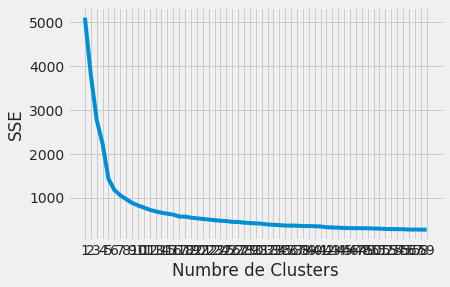

In [247]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
}
sse = []
for k in range(1, 60):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_daily_saintandre_cluster)
    sse.append(kmeans.inertia_)
               
               
plt.style.use("fivethirtyeight")
plt.plot(range(1, 60), sse)
plt.xticks(range(1, 60))
plt.xlabel("Numbre de Clusters")
plt.ylabel("SSE")
plt.show()

In [248]:
k3 = KneeLocator(range(1,60), sse, curve="convex", direction="decreasing")
k3.elbow

9

## Saint Leu

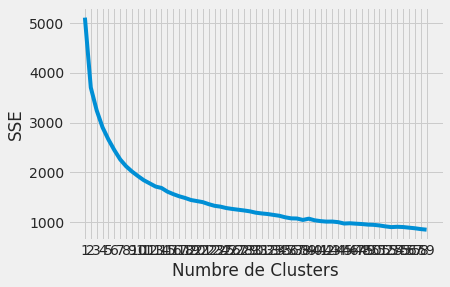

In [249]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
}
sse = []
for k in range(1, 60):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_daily_saintleu_cluster)
    sse.append(kmeans.inertia_)
               
               
plt.style.use("fivethirtyeight")
plt.plot(range(1, 60), sse)
plt.xticks(range(1, 60))
plt.xlabel("Numbre de Clusters")
plt.ylabel("SSE")
plt.show()

In [250]:
k4 = KneeLocator(range(1,60), sse, curve="convex", direction="decreasing")
k4.elbow

15

## Saint Pierre

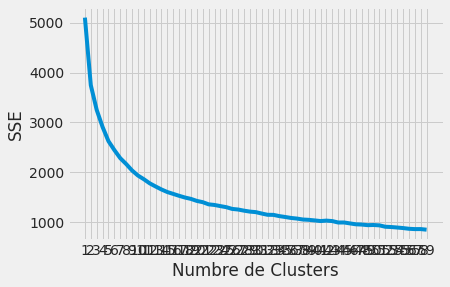

In [251]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
}
sse = []
for k in range(1, 60):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_daily_saintpierre_cluster)
    sse.append(kmeans.inertia_)
               
               
plt.style.use("fivethirtyeight")
plt.plot(range(1, 60), sse)
plt.xticks(range(1, 60))
plt.xlabel("Numbre de Clusters")
plt.ylabel("SSE")
plt.show()

In [252]:
k5= KneeLocator(range(1,60), sse, curve="convex", direction="decreasing")
k5.elbow

12

# Kmeans

## Possession

In [253]:
kmeans = KMeans(n_clusters=k1.elbow)
model = kmeans.fit(data_daily_possession_cluster)##### d_stamp c'était les données de 2014
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [254]:
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    Z = [np.append(A, index) for index, A in enumerate(centers)]
    
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [255]:
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [256]:
features=["Patm_Avg","RH_Avg","Text_Avg","WD_MeanUnitVector", "WS_Mean","FD_Avg","FG_Avg"]

In [257]:
centers1 = model.cluster_centers_
centers1

array([[-6.50869373e-01,  1.17518745e+00, -7.78100694e-01,
         7.49258972e-02,  7.62263568e-01, -8.76908055e-01,
         3.41344044e-01],
       [-9.80765307e-01,  2.48650416e-01,  9.63248974e-01,
        -1.10681845e+00, -1.06673890e+00,  8.16730226e-01,
        -4.18728966e-02],
       [ 2.61399609e-01,  2.15192803e-01, -4.80980003e-01,
         1.89107758e-01,  9.08378199e-01,  4.29449108e-01,
        -2.62545914e-01],
       [ 7.29417096e-01,  1.58553727e-01,  8.82704750e-01,
        -8.72753430e-01, -9.10666035e-01,  6.82771824e-01,
        -1.76555072e-01],
       [ 1.63707017e+00,  2.70286349e-01, -8.96776218e-01,
         6.96707627e-01,  8.56024548e-01, -1.35666275e+00,
         8.54180832e-01],
       [ 7.27581000e-02, -1.08881883e+00, -8.29507418e-01,
         1.25081618e+00,  5.90462450e-01, -4.26565202e-01,
        -5.14417525e-01],
       [-8.66253455e-01,  1.01450564e+00, -2.93503319e-01,
         9.05894068e-03,  1.78097308e-01, -1.41124561e+00,
         2.8559377

In [258]:
P1 = pd_centers(features, centers1)
P1

,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,FD_Avg,FG_Avg,prediction
0,-0.650869,1.175187,-0.778101,0.074926,0.762264,-0.876908,0.341344,0
1,-0.980765,0.248650,0.963249,-1.106818,-1.066739,0.816730,-0.041873,1
2,0.261400,0.215193,-0.480980,0.189108,0.908378,0.429449,-0.262546,2
3,0.729417,0.158554,0.882705,-0.872753,-0.910666,0.682772,-0.176555,3
4,1.637070,0.270286,-0.896776,0.696708,0.856025,-1.356663,0.854181,4
5,0.072758,-1.088819,-0.829507,1.250816,0.590462,-0.426565,-0.514418,5
6,-0.866253,1.014506,-0.293503,0.009059,0.178097,-1.411246,2.855938,6
7,-0.344853,-1.031438,0.723668,0.195798,-0.832720,0.021154,-0.638582,7
8,-3.060665,-3.356830,-4.038052,3.625893,-0.130980,-0.251364,12.028047,8


## Moufia

In [259]:
kmeans = KMeans(n_clusters=k2.elbow)
model = kmeans.fit(data_daily_moufia_cluster)##### d_stamp c'était les données de 2014
print("model\n", model)


model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [260]:
centers2 = model.cluster_centers_
centers2

array([[-0.11941834,  0.21269768, -0.36258807, -0.36229085,  0.98822108,
        -0.85920165,  0.97736049],
       [-0.20711891, -0.58497069,  0.19361002,  1.1309316 , -0.45553093,
         0.59346798, -1.01482004],
       [-0.21650416, -0.11145111,  0.83829368, -0.86886043, -0.9761717 ,
        -0.24341842,  0.12311653],
       [ 5.730685  ,  5.57469835, -0.69226877,  0.57197865,  0.95214832,
        -0.21195067, -0.21811888],
       [-0.03404298, -0.23245535, -1.49146331,  0.6296104 ,  0.92425677,
         0.89532007, -0.96516929],
       [-0.25937305, -0.31981721,  0.50400167, -0.46077481, -0.88317096,
         1.11983463, -0.85591438],
       [-0.28466005,  0.0873018 ,  1.23854404, -0.93386792, -1.00846309,
        -0.82723951,  1.63332605],
       [-0.19327067, -0.41720798, -1.7153223 ,  1.37167365,  0.80861044,
         3.21991297,  0.46203846],
       [ 0.01464845, -0.32896181,  0.22394417,  1.08021258, -0.38212236,
        -0.67206098,  0.45126384],
       [-0.05607087, -0.0983

In [261]:
P2 = pd_centers(features, centers2)
P2

,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,FD_Avg,FG_Avg,prediction
0,-0.119418,0.212698,-0.362588,-0.362291,0.988221,-0.859202,0.977360,0
1,-0.207119,-0.584971,0.193610,1.130932,-0.455531,0.593468,-1.014820,1
2,-0.216504,-0.111451,0.838294,-0.868860,-0.976172,-0.243418,0.123117,2
3,5.730685,5.574698,-0.692269,0.571979,0.952148,-0.211951,-0.218119,3
4,-0.034043,-0.232455,-1.491463,0.629610,0.924257,0.895320,-0.965169,4
5,-0.259373,-0.319817,0.504002,-0.460775,-0.883171,1.119835,-0.855914,5
6,-0.284660,0.087302,1.238544,-0.933868,-1.008463,-0.827240,1.633326,6
7,-0.193271,-0.417208,-1.715322,1.371674,0.808610,3.219913,0.462038,7
8,0.014648,-0.328962,0.223944,1.080213,-0.382122,-0.672061,0.451264,8
9,-0.056071,-0.098303,-0.452572,0.302278,0.820670,-0.300574,-0.380514,9


## Saint Andre

In [262]:
kmeans = KMeans(n_clusters=k3.elbow)
model = kmeans.fit(data_daily_saintandre_cluster)##### d_stamp c'était les données de 2014
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [263]:
centers3 = model.cluster_centers_
centers3

array([[-2.17658930e-01, -2.52264121e-01, -1.75924441e-01,
         8.13577242e-01,  6.04486608e-01,  2.41661548e+00,
         6.43844083e-01],
       [-9.63797745e-02,  1.16402886e-02, -5.28755342e-02,
        -3.37349556e-02,  8.42801770e-01,  1.35083003e-01,
         9.49981279e-02],
       [-2.15822267e-01, -2.66061113e-01,  1.06853035e-01,
        -3.02845437e-01, -6.87399316e-01,  3.61600126e-01,
        -4.26681687e-01],
       [ 5.64524571e+00,  5.54327895e+00, -7.76314514e-02,
         4.10034824e-01,  9.75718779e-01, -7.83126600e-01,
        -1.49926169e+00],
       [-2.38241503e-01, -1.67540613e-01, -1.87324810e+01,
        -5.46688039e+00, -4.18334098e+00, -1.65301724e+00,
        -1.77909722e+00],
       [-5.76923628e-02, -5.77892372e-02, -1.30428486e-01,
         2.99220731e-01,  1.19776002e+00, -2.66457312e+00,
        -2.20420446e+00],
       [-2.94732525e-01, -6.53372690e-02,  2.31884377e-01,
        -1.41944077e+00, -1.03552671e+00,  1.26272533e-01,
         6.2348059

In [264]:
P3 = pd_centers(features, centers3)
P3

,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,FD_Avg,FG_Avg,prediction
0,-0.217659,-0.252264,-0.175924,0.813577,0.604487,2.416615,0.643844,0
1,-0.096380,0.011640,-0.052876,-0.033735,0.842802,0.135083,0.094998,1
2,-0.215822,-0.266061,0.106853,-0.302845,-0.687399,0.361600,-0.426682,2
3,5.645246,5.543279,-0.077631,0.410035,0.975719,-0.783127,-1.499262,3
4,-0.238242,-0.167541,-18.732481,-5.466880,-4.183341,-1.653017,-1.779097,4
5,-0.057692,-0.057789,-0.130428,0.299221,1.197760,-2.664573,-2.204204,5
6,-0.294733,-0.065337,0.231884,-1.419441,-1.035527,0.126273,0.623481,6
7,-0.164963,-0.228337,0.232388,0.053565,-0.901669,0.145424,0.890729,7
8,-0.138813,-0.470810,0.026424,1.479801,-0.045701,0.287149,0.153359,8


## Saint Leu

In [265]:
kmeans = KMeans(n_clusters=k4.elbow)
model = kmeans.fit(data_daily_saintleu_cluster)##### d_stamp c'était les données de 2014
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [266]:
centers4 = model.cluster_centers_
centers4

array([[-0.98757625, -0.48900802,  0.66819818, -0.32785934, -0.60312158,
        -0.61056532, -0.1711421 ],
       [ 1.23685344, -0.07217153, -0.80152443,  0.85495545,  1.03621164,
         0.62657122, -0.50010411],
       [-1.18953848,  0.06256762,  1.1328116 , -1.50068008, -1.37417658,
        -1.05059073,  1.3332882 ],
       [ 0.84382122,  0.50311642,  0.66535569, -0.18055467, -0.46417274,
         0.58452818, -0.40520795],
       [-0.33840467,  0.77676231, -0.95000809, -0.17802492,  0.68959752,
        -0.72726158,  0.4429936 ],
       [-0.06665538, -0.30697623,  0.69843309,  0.05515682, -1.23078529,
        -0.96610144,  2.02650341],
       [ 0.40705902,  1.21794754, -0.44472934,  0.13771526,  1.06718047,
         0.68614679, -0.4473437 ],
       [-0.32429684, -1.63670431, -1.19914428,  1.42744283,  0.70440544,
        -0.10514622, -0.75861893],
       [-0.24063152, -1.40165147,  0.33603079,  0.7151342 , -0.60118706,
        -0.15287713, -0.47718129],
       [ 0.49779055,  0.3994

In [267]:
P4 = pd_centers(features, centers4)
P4

,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,FD_Avg,FG_Avg,prediction
0,-0.987576,-0.489008,0.668198,-0.327859,-0.603122,-0.610565,-0.171142,0
1,1.236853,-0.072172,-0.801524,0.854955,1.036212,0.626571,-0.500104,1
2,-1.189538,0.062568,1.132812,-1.500680,-1.374177,-1.050591,1.333288,2
3,0.843821,0.503116,0.665356,-0.180555,-0.464173,0.584528,-0.405208,3
4,-0.338405,0.776762,-0.950008,-0.178025,0.689598,-0.727262,0.442994,4
5,-0.066655,-0.306976,0.698433,0.055157,-1.230785,-0.966101,2.026503,5
6,0.407059,1.217948,-0.444729,0.137715,1.067180,0.686147,-0.447344,6
7,-0.324297,-1.636704,-1.199144,1.427443,0.704405,-0.105146,-0.758619,7
8,-0.240632,-1.401651,0.336031,0.715134,-0.601187,-0.152877,-0.477181,8
9,0.497791,0.399444,-2.265792,0.716259,1.101779,3.867706,1.593031,9


## Saint Pierre

In [268]:
kmeans = KMeans(n_clusters=k5.elbow)
model = kmeans.fit(data_daily_saintpierre_cluster)##### d_stamp c'était les données de 2014
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [269]:
centers5 = model.cluster_centers_
centers5

array([[ 0.4927853 , -0.03611096, -2.34953515,  1.36415605,  0.82644181,
         4.55660369,  2.60312806],
       [-0.65483815, -0.6353044 ,  0.22417687,  0.07345661, -0.15483114,
        -0.22057496, -0.61077001],
       [-0.93475222,  0.48261233,  1.13534045, -0.6545118 , -1.00124388,
        -0.60528091,  2.00022464],
       [ 1.39330236, -0.29976042, -0.86111044,  0.95342753,  0.93327137,
         0.65910901, -0.62216757],
       [-0.66581438,  0.02011716,  1.0857453 , -1.08451978, -1.21951157,
        -0.92859624,  0.42349759],
       [ 0.34590384,  0.45513603, -0.94862747,  0.14871077,  0.79969328,
        -0.40876084, -0.21705067],
       [ 0.0328365 ,  0.78557737, -0.50765735,  0.00674945,  1.18326597,
         1.19449623, -0.557852  ],
       [ 0.94263284,  0.23956451,  0.54696207, -0.50970883, -0.44082412,
         0.43651093, -0.36876254],
       [-0.88604462,  0.18201873,  0.55469921, -1.29152952, -0.67353004,
         0.97488301, -0.39414022],
       [ 0.14080862, -2.3059

In [270]:
P5 = pd_centers(features, centers5)
P5

,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,FD_Avg,FG_Avg,prediction
0,0.492785,-0.036111,-2.349535,1.364156,0.826442,4.556604,2.603128,0
1,-0.654838,-0.635304,0.224177,0.073457,-0.154831,-0.220575,-0.610770,1
2,-0.934752,0.482612,1.135340,-0.654512,-1.001244,-0.605281,2.000225,2
3,1.393302,-0.299760,-0.861110,0.953428,0.933271,0.659109,-0.622168,3
4,-0.665814,0.020117,1.085745,-1.084520,-1.219512,-0.928596,0.423498,4
5,0.345904,0.455136,-0.948627,0.148711,0.799693,-0.408761,-0.217051,5
6,0.032836,0.785577,-0.507657,0.006749,1.183266,1.194496,-0.557852,6
7,0.942633,0.239565,0.546962,-0.509709,-0.440824,0.436511,-0.368763,7
8,-0.886045,0.182019,0.554699,-1.291530,-0.673530,0.974883,-0.394140,8
9,0.140809,-2.305913,-1.267776,1.872440,0.241488,-0.105556,-0.897188,9


# CENTROIDE CARACTERISTIQUES

## Possession

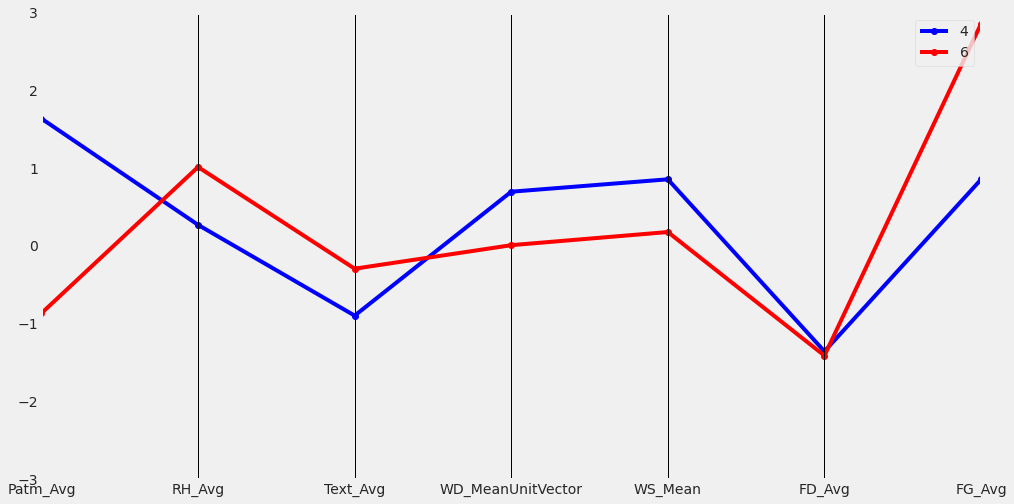

In [271]:
parallel_plot(P1[(P1['FG_Avg'] >0.5) & (P1['FG_Avg']<12) ])## for high FG

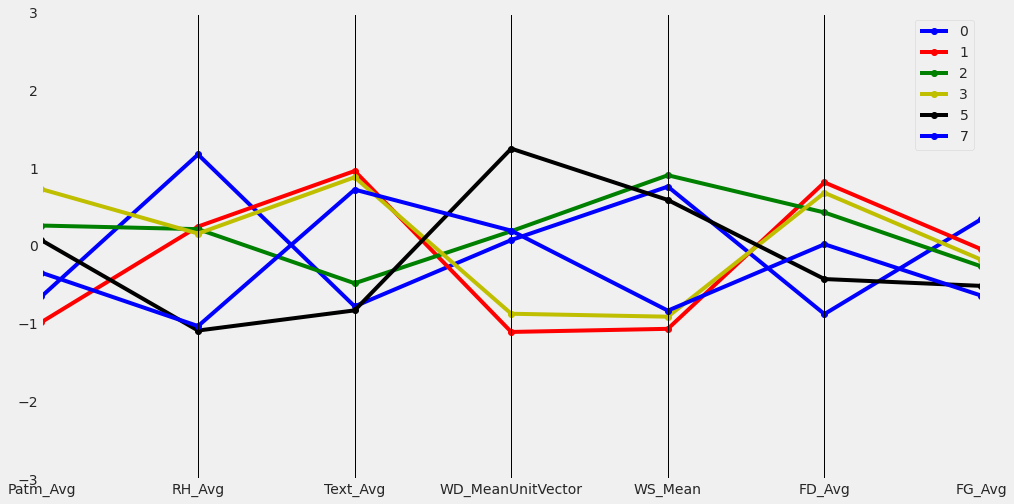

In [272]:
parallel_plot(P1[P1['FG_Avg']<0.5])## For low FG

## Moufia

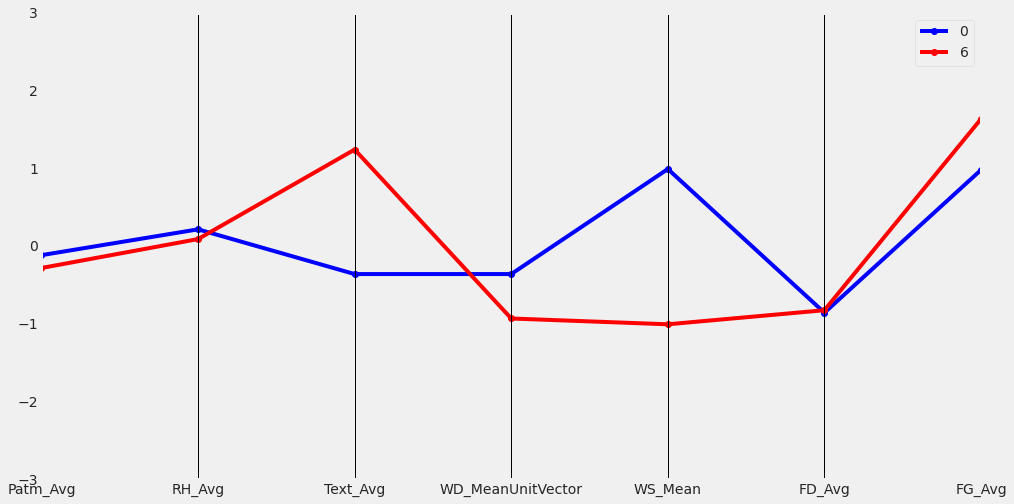

In [273]:
parallel_plot(P2[(P2['FG_Avg'] >0.5) & (P2['FG_Avg']<12) ])## for high FG

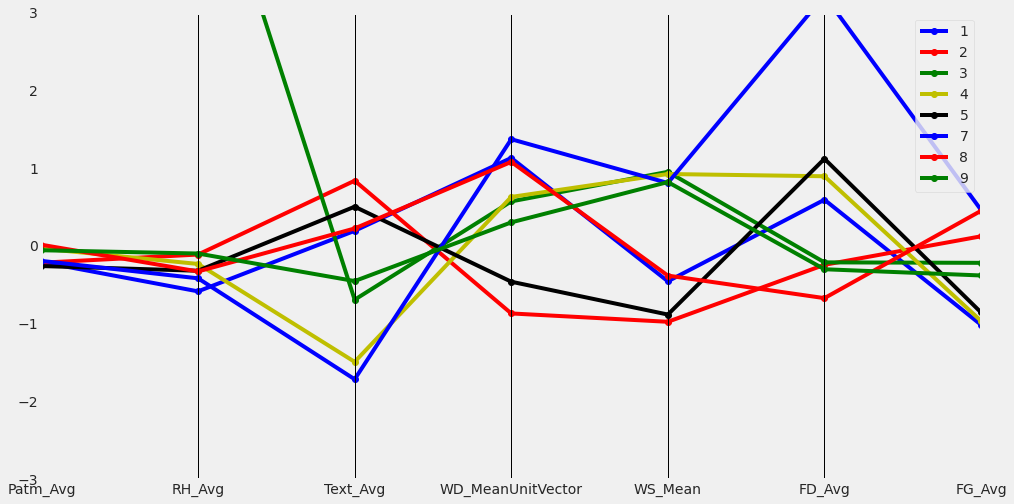

In [274]:
parallel_plot(P2[P2['FG_Avg']<0.5])## For low FG

## Saint Andre

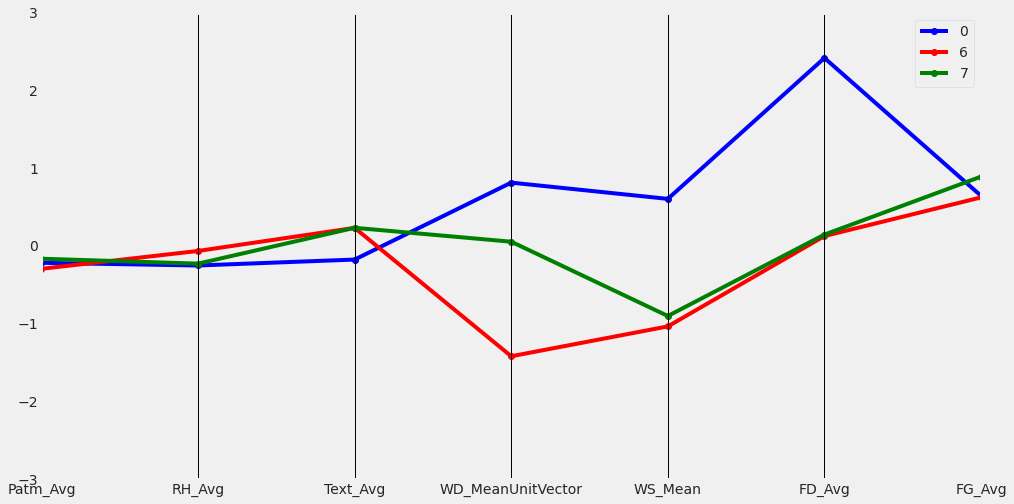

In [275]:
parallel_plot(P3[(P3['FG_Avg'] >0.5) & (P3['FG_Avg']<12) ])## for high FG

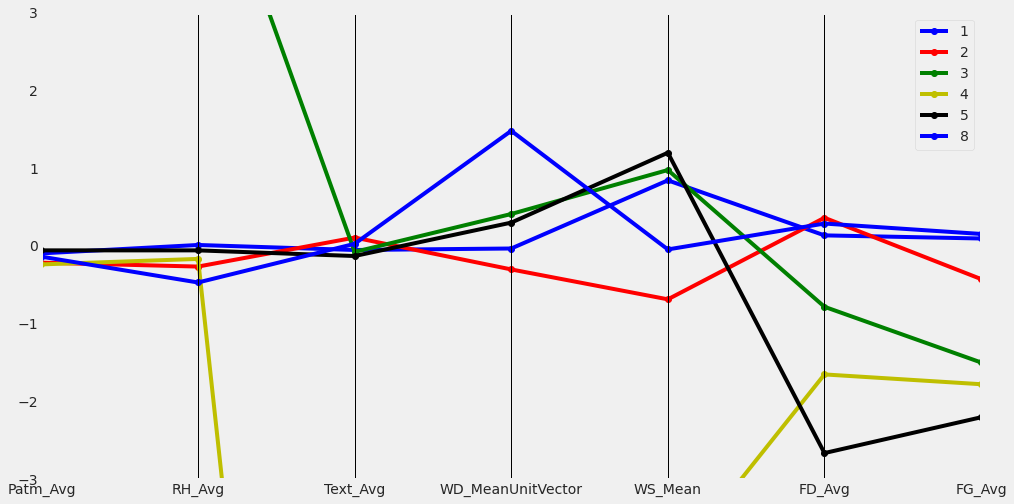

In [276]:
parallel_plot(P3[P3['FG_Avg']<0.5])## For low FG

## Saint Leu

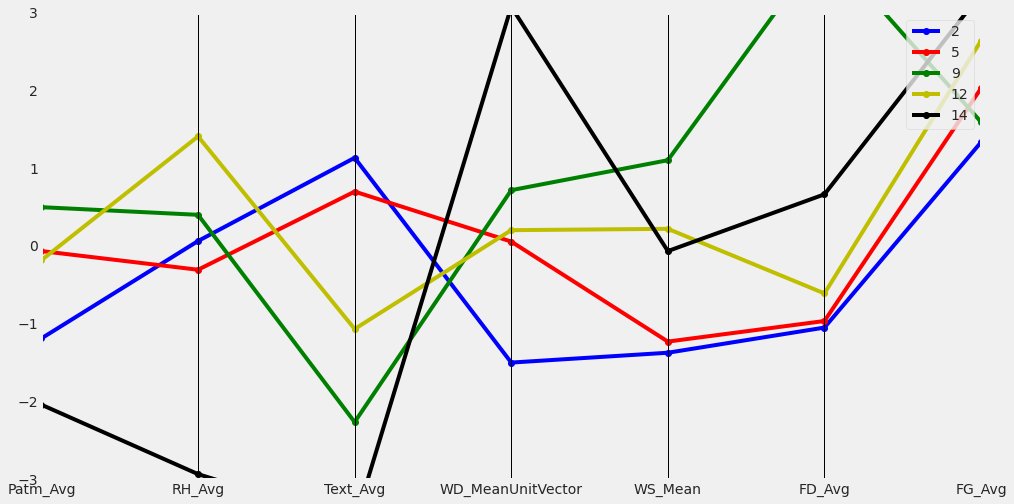

In [277]:
parallel_plot(P4[(P4['FG_Avg'] >0.5) & (P4['FG_Avg']<12) ])## for high FG

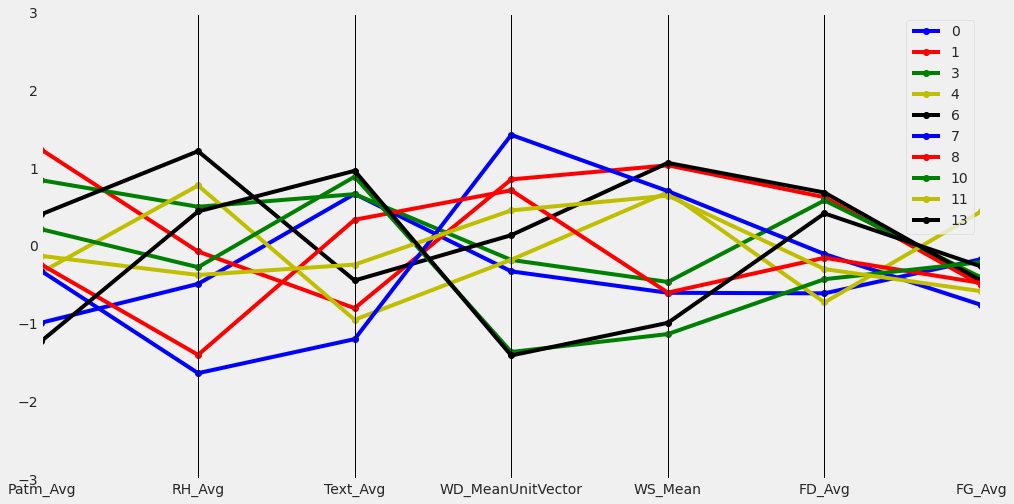

In [278]:
parallel_plot(P4[P4['FG_Avg']<0.5])## For low FG

## Saint Pierre

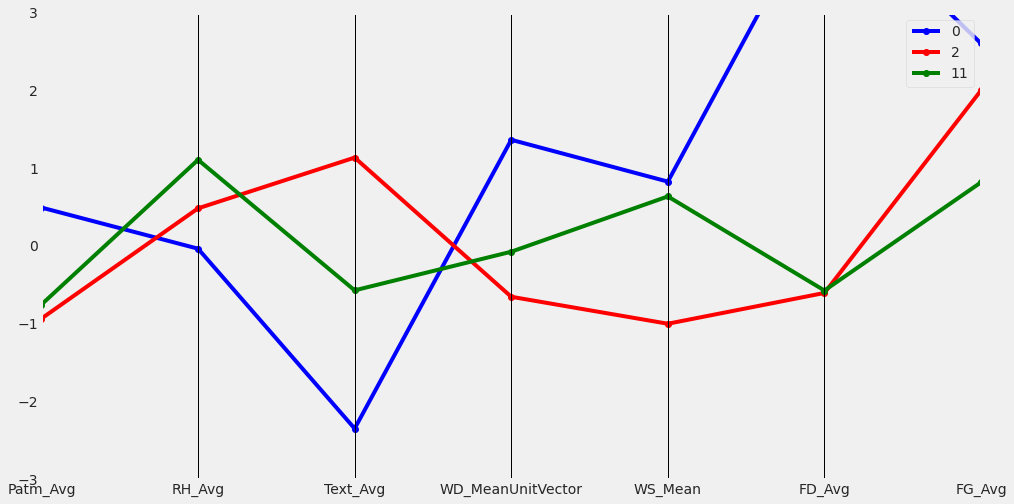

In [279]:
parallel_plot(P5[(P5['FG_Avg'] >0.5) & (P5['FG_Avg']<12) ])## for high FG

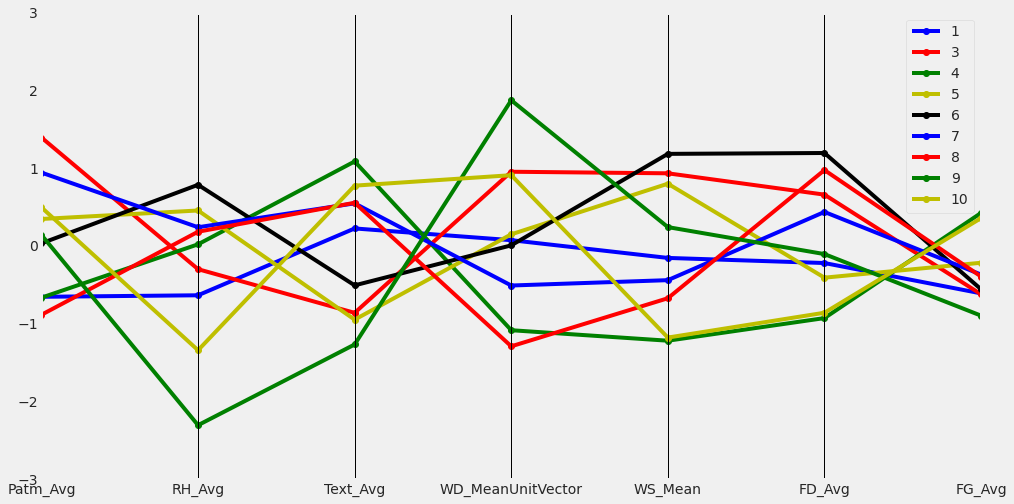

In [280]:
parallel_plot(P5[P5['FG_Avg']<0.5])## For low FG

# FBProphet

In [284]:
df = pd.read_csv("possession_2014_2015.csv")
df1 = pd.read_csv("moufia_2014_2015.csv")
df2 = pd.read_csv("saintandre_2014_2015.csv")
df3 = pd.read_csv("saintleu_2014_2015.csv")
df4 = pd.read_csv("saintpierre_2014_2015.csv")

In [285]:
df["Kb"]=(df["FG_Avg"]-df["FD_Avg"])/df["FG_Avg"]

In [286]:
df1["Kb"]=(df1["FG_Avg"]-df1["FD_Avg"])/df1["FG_Avg"]
df2["Kb"]=(df2["FG_Avg"]-df2["FD_Avg"])/df2["FG_Avg"]
df3["Kb"]=(df3["FG_Avg"]-df3["FD_Avg"])/df3["FG_Avg"]
df4["Kb"]=(df4["FG_Avg"]-df4["FD_Avg"])/df4["FG_Avg"]

In [287]:
df=df[df["Kb"]>=0]
df1=df1[df1["Kb"]>=0]
df2=df2[df2["Kb"]>=0]
df3=df3[df3["Kb"]>=0]
df4=df4[df4["Kb"]>=0]
df1=df1[df1["Kb"]<=1]
df2=df2[df2["Kb"]<=1]
df3=df3[df3["Kb"]<=1]
df4=df4[df4["Kb"]<=1]
df=df[df["FG_Avg"]<=1400]
df1=df1[df1["FG_Avg"]<=1400]
df2=df2[df2["FG_Avg"]<=1400]
df3=df3[df3["FG_Avg"]<=1400]
df4=df4[df4["FG_Avg"]<=1400]

In [288]:
import time
from datetime import datetime


d = datetime(2015, 1, 1, 0, 0,0)

df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y%m%d %H:%M:%S')
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'], format='%Y%m%d %H:%M:%S')
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'], format='%Y%m%d %H:%M:%S')
df3['Timestamp'] = pd.to_datetime(df3['Timestamp'], format='%Y%m%d %H:%M:%S')
df4['Timestamp'] = pd.to_datetime(df4['Timestamp'], format='%Y%m%d %H:%M:%S')


d = datetime(2015, 1, 1, 0,0)
P_2014=df[df["Timestamp"]<d ]
P_2015=df[df["Timestamp"]>=d]

M_2014=df1[df1["Timestamp"]<d ]
M_2015=df1[df1["Timestamp"]>=d]


SA_2014=df2[df2["Timestamp"]<d ]
SA_2015=df2[df2["Timestamp"]>=d]


SL_2014=df3[df3["Timestamp"]<d ]
SL_2015=df3[df3["Timestamp"]>=d]

SP_2014=df4[df4["Timestamp"]<d ]
SP_2015=df4[df4["Timestamp"]>=d]
import matplotlib.pyplot as mp 
import seaborn as sb 
import numpy as np 

Q1 = P_2014['Patm_Avg'].quantile(0.25)
Q3 = P_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (P_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (P_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

#P_2014 = P_2014.loc[filter1]  


Q1 = P_2015['Patm_Avg'].quantile(0.25)
Q3 = P_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (P_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (P_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
#P_2015 = P_2015.loc[filter2]


###### MOUFIA SUPPRESSION DES OUTLIERS




Q1 = M_2014['Patm_Avg'].quantile(0.25)
Q3 = M_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (M_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (M_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

#M_2014 = M_2014.loc[filter1]  


Q1 = M_2015['Patm_Avg'].quantile(0.25)
Q3 = M_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (M_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (M_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
#M_2015 = M_2015.loc[filter2]




###### SAINT ANDRE SUPPRESSION DES OUTLIERS






Q1 = SA_2014['Patm_Avg'].quantile(0.25)
Q3 = SA_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SA_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SA_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

#SA_2014 = SA_2014.loc[filter1]  


Q1 = SA_2015['Patm_Avg'].quantile(0.25)
Q3 = SA_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SA_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SA_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
#SA_2015 = SA_2015.loc[filter2]




###### SAINT LE SUPPRESSION DES OUTLIERS


Q1 = SL_2014['Patm_Avg'].quantile(0.25)
Q3 = SL_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SL_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SL_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

#SL_2014 = SL_2014.loc[filter1]  


Q1 = SL_2015['Patm_Avg'].quantile(0.25)
Q3 = SL_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SL_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SL_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
SL_2015 = SL_2015.loc[filter2]



###### SAINT PIERRE SUPPRESSION DES OUTLIERS




Q1 = SP_2014['Patm_Avg'].quantile(0.25)
Q3 = SP_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SP_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SP_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

#SP_2014 = SP_2014.loc[filter1]  


Q1 = SP_2015['Patm_Avg'].quantile(0.25)
Q3 = SP_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SP_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SP_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
#SP_2015 = SP_2015.loc[filter2]




In [289]:
Q1 = P_2014['FD_Avg'].quantile(0.25)
Q3 = P_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (P_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (P_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

#P_2014 = P_2014.loc[filter1]  


Q1 = P_2015['FD_Avg'].quantile(0.25)
Q3 = P_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (P_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (P_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
#P_2015 = P_2015.loc[filter2]


###### MOUFIA SUPPRESSION DES OUTLIERS




Q1 = M_2014['FD_Avg'].quantile(0.25)
Q3 = M_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (M_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (M_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

#M_2014 = M_2014.loc[filter1]  


Q1 = M_2015['FD_Avg'].quantile(0.25)
Q3 = M_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (M_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (M_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
#M_2015 = M_2015.loc[filter2]




###### SAINT ANDRE SUPPRESSION DES OUTLIERS






Q1 = SA_2014['FD_Avg'].quantile(0.25)
Q3 = SA_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SA_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (SA_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

#SA_2014 = SA_2014.loc[filter1]  


Q1 = SA_2015['FD_Avg'].quantile(0.25)
Q3 = SA_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SA_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (SA_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
#SA_2015 = SA_2015.loc[filter2]




###### SAINT LE SUPPRESSION DES OUTLIERS


Q1 = SL_2014['FD_Avg'].quantile(0.25)
Q3 = SL_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SL_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (SL_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

SL_2014 = SL_2014.loc[filter1]  


Q1 = SL_2015['FD_Avg'].quantile(0.25)
Q3 = SL_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SL_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (SL_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
SL_2015 = SL_2015.loc[filter2]



###### SAINT PIERRE SUPPRESSION DES OUTLIERS




Q1 = SP_2014['FD_Avg'].quantile(0.25)
Q3 = SP_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SP_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (SP_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

#SP_2014 = SP_2014.loc[filter1]  


Q1 = SP_2015['FD_Avg'].quantile(0.25)
Q3 = SP_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SP_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (SP_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
#SP_2015 = SP_2015.loc[filter2]

In [290]:
data_hourly_possession = df.resample('H',on='Timestamp').mean()
data_hourly_moufia = df1.resample('H',on='Timestamp').mean()
data_hourly_saintandre = df2.resample('H',on='Timestamp').mean()
data_hourly_saintleu = df3.resample('H',on='Timestamp').mean()
data_hourly_saintpierre = df4.resample('H',on='Timestamp').mean()

In [291]:
data_hourly_possession=data_hourly_possession.reset_index()
data_hourly_moufia=data_hourly_moufia.reset_index()
data_hourly_saintandre=data_hourly_saintandre.reset_index()
data_hourly_saintleu=data_hourly_saintleu.reset_index()
data_hourly_saintpierre=data_hourly_saintpierre.reset_index()

## Possession

In [292]:
import pandas as pd
from fbprophet import Prophet
X_train = data_hourly_possession[:-3000]
X_test = data_hourly_possession[-3000:]
X_train["y"]= X_train["Kb"]
X_train["ds"]=X_train["Timestamp"]
#X_train = X_train.drop('FG_Avg', 1)
X_train = X_train.drop('Timestamp',1)
m = Prophet()

m.add_regressor("Patm_Avg")
m.add_regressor("RH_Avg")
m.add_regressor("Text_Avg")
m.add_regressor("WD_MeanUnitVector")
m.add_regressor("WS_Mean")

m.add_regressor("FD_Avg")
m.add_regressor("FG_Avg")

m.fit(X_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [293]:
X_test["ds"]= X_test["Timestamp"]
X_test["y"]= X_test['Kb']
futur = pd.DataFrame(X_test["ds"])
futur["Patm_Avg"] = X_test["Patm_Avg"]
futur["FD_Avg"] = X_test["FD_Avg"]
futur["FG_Avg"] = X_test["FG_Avg"]

futur["RH_Avg"] = X_test["RH_Avg"]
futur["Text_Avg"] = X_test["Text_Avg"]
futur["WD_MeanUnitVector"] = X_test["WD_MeanUnitVector"]
futur["WS_Mean"] = X_test["WS_Mean"]
print(futur)

                       ds     Patm_Avg  ...  WD_MeanUnitVector   WS_Mean
14496 2015-08-28 00:00:00  1021.846000  ...         129.365362  1.514286
14497 2015-08-28 01:00:00  1021.560579  ...         126.568153  1.780702
14498 2015-08-28 02:00:00  1021.308318  ...         132.445886  1.358333
14499 2015-08-28 03:00:00  1021.042200  ...         124.314343  1.400556
14500 2015-08-28 04:00:00  1020.630393  ...         134.374468  1.180357
...                   ...          ...  ...                ...       ...
17491 2015-12-30 19:00:00  1009.735667  ...         161.545603  1.205555
17492 2015-12-30 20:00:00  1009.933848  ...         147.995273  1.130808
17493 2015-12-30 21:00:00  1010.377116  ...         142.844384  1.137209
17494 2015-12-30 22:00:00  1010.793676  ...         144.904441  0.945495
17495 2015-12-30 23:00:00  1010.437233  ...         118.839246  1.551111

[3000 rows x 8 columns]


In [294]:
forecast = m.predict(futur)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2995,2015-12-30 19:00:00,0.408354,0.279964,0.533064
2996,2015-12-30 20:00:00,0.461223,0.332125,0.594426
2997,2015-12-30 21:00:00,0.473214,0.336274,0.600295
2998,2015-12-30 22:00:00,0.452790,0.337603,0.585521
2999,2015-12-30 23:00:00,0.429823,0.296819,0.564150


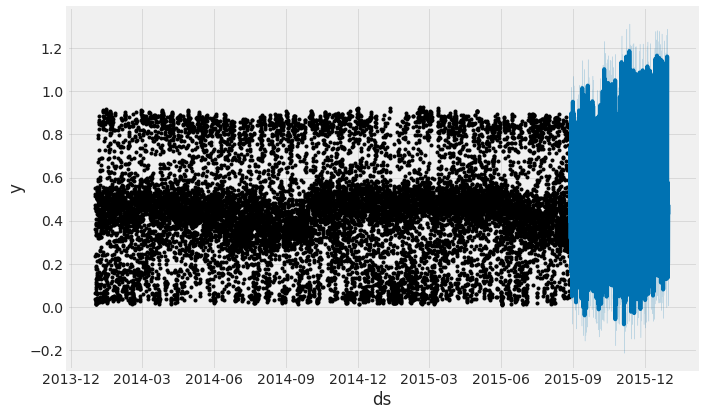

In [295]:
fig1 = m.plot(forecast)


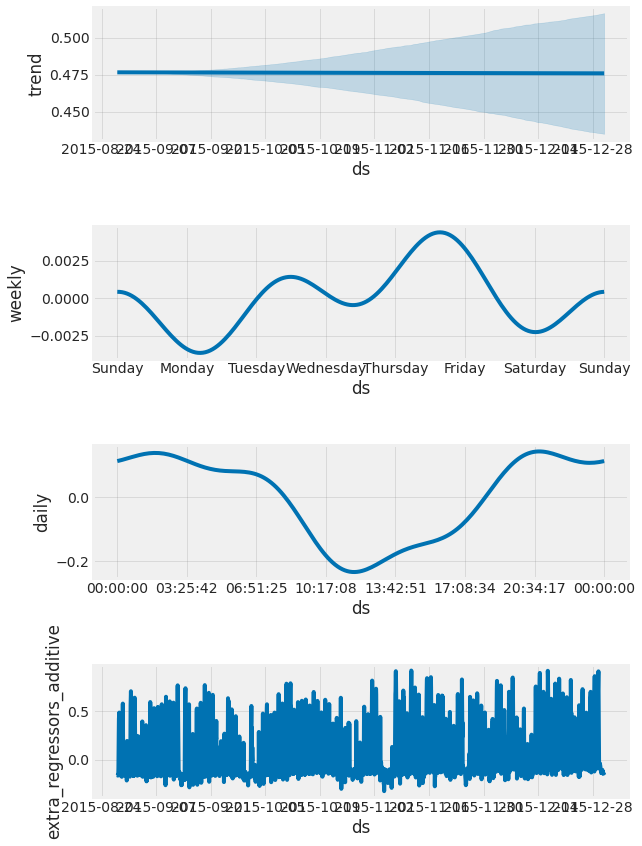

In [296]:
fig2 = m.plot_components(forecast)


In [297]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(X_test["Kb"], forecast["yhat"])
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.106666


## Saint-Andre

In [298]:
X_train = data_hourly_saintandre[:-3000]
X_test = data_hourly_saintandre[-3000:]
X_train["y"]= X_train["Kb"]
X_train["ds"]=X_train["Timestamp"]
#X_train = X_train.drop('FG_Avg', 1)
X_train = X_train.drop('Timestamp',1)
m = Prophet()

m.add_regressor("Patm_Avg")
m.add_regressor("RH_Avg")
m.add_regressor("Text_Avg")
m.add_regressor("WD_MeanUnitVector")
m.add_regressor("WS_Mean")

m.add_regressor("FD_Avg")
m.add_regressor("FG_Avg")

m.fit(X_train)
X_test["ds"]= X_test["Timestamp"]
X_test["y"]= X_test['Kb']
futur = pd.DataFrame(X_test["ds"])
futur["Patm_Avg"] = X_test["Patm_Avg"]
futur["FD_Avg"] = X_test["FD_Avg"]
futur["FG_Avg"] = X_test["FG_Avg"]

futur["RH_Avg"] = X_test["RH_Avg"]
futur["Text_Avg"] = X_test["Text_Avg"]
futur["WD_MeanUnitVector"] = X_test["WD_MeanUnitVector"]
futur["WS_Mean"] = X_test["WS_Mean"]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [299]:
forecast = m.predict(futur)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast_errors = [X_test["Kb"][14497+i]-forecast["yhat"][i] for i in range(len(X_test))]
bias = sum(forecast_errors) * 1.0/len(X_test)
mse = mean_squared_error(X_test["Kb"], forecast["yhat"])
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.142894


## Saint-Leu

In [300]:
X_train = data_hourly_saintleu[:-3000]
X_test = data_hourly_saintleu[-3000:]
X_train["y"]= X_train["Kb"]
X_train["ds"]=X_train["Timestamp"]
#X_train = X_train.drop('FG_Avg', 1)
X_train = X_train.drop('Timestamp',1)
m = Prophet()

m.add_regressor("Patm_Avg")
m.add_regressor("RH_Avg")
m.add_regressor("Text_Avg")
m.add_regressor("WD_MeanUnitVector")
m.add_regressor("WS_Mean")

m.add_regressor("FD_Avg")
m.add_regressor("FG_Avg")

m.fit(X_train)
X_test["ds"]= X_test["Timestamp"]
X_test["y"]= X_test['Kb']
futur = pd.DataFrame(X_test["ds"])
futur["Patm_Avg"] = X_test["Patm_Avg"]
futur["FD_Avg"] = X_test["FD_Avg"]
futur["FG_Avg"] = X_test["FG_Avg"]

futur["RH_Avg"] = X_test["RH_Avg"]
futur["Text_Avg"] = X_test["Text_Avg"]
futur["WD_MeanUnitVector"] = X_test["WD_MeanUnitVector"]
futur["WS_Mean"] = X_test["WS_Mean"]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [301]:
forecast = m.predict(futur)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast_errors = [X_test["Kb"][14497+i]-forecast["yhat"][i] for i in range(len(X_test))]
bias = sum(forecast_errors) * 1.0/len(X_test)
mse = mean_squared_error(X_test["Kb"], forecast["yhat"])
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.127599


## Saint-Pierre

In [302]:
X_train = data_hourly_saintpierre[:-3000]
X_test = data_hourly_saintpierre[-3000:]
X_train["y"]= X_train["Kb"]
X_train["ds"]=X_train["Timestamp"]
#X_train = X_train.drop('FG_Avg', 1)
X_train = X_train.drop('Timestamp',1)
m = Prophet()

m.add_regressor("Patm_Avg")
m.add_regressor("RH_Avg")
m.add_regressor("Text_Avg")
m.add_regressor("WD_MeanUnitVector")
m.add_regressor("WS_Mean")

m.add_regressor("FD_Avg")
m.add_regressor("FG_Avg")

m.fit(X_train)
X_test["ds"]= X_test["Timestamp"]
X_test["y"]= X_test['Kb']
futur = pd.DataFrame(X_test["ds"])
futur["Patm_Avg"] = X_test["Patm_Avg"]
futur["FD_Avg"] = X_test["FD_Avg"]
futur["FG_Avg"] = X_test["FG_Avg"]

futur["RH_Avg"] = X_test["RH_Avg"]
futur["Text_Avg"] = X_test["Text_Avg"]
futur["WD_MeanUnitVector"] = X_test["WD_MeanUnitVector"]
futur["WS_Mean"] = X_test["WS_Mean"]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [303]:
forecast = m.predict(futur)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast_errors = [X_test["Kb"][14496+i]-forecast["yhat"][i] for i in range(len(X_test))]
bias = sum(forecast_errors) * 1.0/len(X_test)
mse = mean_squared_error(X_test["Kb"], forecast["yhat"])
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.142517
